# Data Analysis - First Exploration and Features

## Cargando dataset y preparación inicial

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import altair as alt

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe final de extracción, donde están todas las canciones
df_timeseries_final = pd.read_csv("data_allyear/data_ana_timeseries_final.csv", sep = ',', parse_dates=['date','year_month', 'release_date_year'])
print('Tamaño inicial: ', df_timeseries_final.shape)

df_timeseries_final_month = pd.read_csv("data_allyear/data_ana_timeseries_final.csv", sep = ',', parse_dates=['date','year_month', 'release_date_year'])
print('Tamaño inicial: ', df_timeseries_final.shape)

# Quitamos algunas columnas que no usaremos y sobran
df_timeseries_final = df_timeseries_final.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'name', 'time_signature','artist', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre6',
                                                    'genre7', 'genre8', 'genre9','genre10','10'])
df_timeseries_final_month = df_timeseries_final_month.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'name', 'time_signature','artist', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre6',
                                                    'genre7', 'genre8', 'genre9','genre10','10'])
print('Tamaño quitando columnas que sobran: ', df_timeseries_final.shape)
df_timeseries_final.head(5)

/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Tamaño inicial:  (285741, 48)
Tamaño inicial:  (285741, 48)
Tamaño quitando columnas que sobran:  (285741, 32)


,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final
0,Tusa,KAROL G,344475.0,2020-01-01,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,1,2020-01-01,472515212.0,6.399289e+09,11238605.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton
1,Tusa,KAROL G,436442.0,2020-01-02,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,2,2020-01-01,472515212.0,6.399289e+09,14874893.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton
2,Tusa,KAROL G,447837.0,2020-01-03,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,3,2020-01-01,472515212.0,6.399289e+09,15369224.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton
3,Tusa,KAROL G,442161.0,2020-01-04,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,4,2020-01-01,472515212.0,6.399289e+09,14592459.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton
4,Tusa,KAROL G,419754.0,2020-01-05,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,5,2020-01-01,472515212.0,6.399289e+09,13511143.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton


## Ponderar por día

In [23]:
# Calculamos los pesos de cada canción respecto al total del día
df_timeseries_final['streamstotal_weights_day'] = df_timeseries_final['streams_song_day']/df_timeseries_final['streams_day']
print ('Suma de pesos de streams del día(debería salir 1):', df_timeseries_final[df_timeseries_final.date == '2020-07-04']['streamstotal_weights_day'].sum())
df_timeseries_final[df_timeseries_final.date == '2020-07-04'].sort_values(by=['streams_song_day'], ascending=False)

Suma de pesos de streams del día(debería salir 1): 0.9924091491244612


,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final,streamstotal_weights_day
52100,Caramelo,Ozuna,509771.0,2020-07-04,3gD4J3RUHy4OUuZ3qAiaiG,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Caramelo,2020-06-11,0.399018,0.852632,0.05310,0.728,0.806,0.000301,0.1530,0.856712,0.086890,0.698,0.792412,2020-01-01,"latin,puerto rican pop,reggaeton,trap latino",1i8SpTcr7yvPOmcqrbnVXY,26568238,0.94,latin and reggaeton,0.025800
203333,La Jeepeta - Remix,Nio Garcia,480511.0,2020-07-04,1mohfLaTJtB2RplHLQVM70,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,La Jeepeta (Remix),2020-04-24,0.682234,0.863158,0.30000,0.815,0.715,0.000005,0.0910,0.828947,0.288703,0.786,0.829764,2020-01-01,"latin,reggaeton,trap latino,tropical",5hdhHgpxyniooUiQVaPxQ0,1566476,0.82,latin and reggaeton,0.024319
6580,El Manual,Anuel AA,436512.0,2020-07-04,7kOf0qHO4Rcwk6QJifZDRJ,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Emmanuel,2020-05-29,0.383663,0.747368,0.35000,0.843,0.845,0.001680,0.0527,0.901376,0.070153,0.898,0.598674,2020-01-01,"latin,reggaeton,reggaeton flow,trap boricua,tr...",2R21vXR83lH98kGeO99Y66,16155909,0.93,latin and reggaeton,0.022092
213843,Carita de Inocente (feat. Myke Towers) - Remix,Prince Royce,385170.0,2020-07-04,5kQre7o8ky5DXeEPcyaCR1,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Carita de Inocente (feat. Myke Towers) [Remix],2020-06-01,0.343907,0.778947,0.36400,0.565,0.781,0.000000,0.0984,0.869527,0.085077,0.943,0.612676,2020-01-01,"bachata,latin,latin pop,trap latino,tropical",3MHaV05u0io8fQbZ2XPtlC,5976443,0.81,latin and reggaeton,0.019493
5616,Hasta Que Dios Diga,Anuel AA,373341.0,2020-07-04,06s3QtMJVXw1AJX3UfvZG1,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Emmanuel,2020-05-29,0.462127,0.842105,0.46400,0.691,0.765,0.000003,0.2030,0.826528,0.154812,0.855,0.820401,2020-01-01,"latin,reggaeton,reggaeton flow,trap boricua,tr...",2R21vXR83lH98kGeO99Y66,16155909,0.93,latin and reggaeton,0.018895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216554,Volveré a Empezar,Stay Homas,37842.0,2020-07-04,2KDNePHNaahkf8okcATp51,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Volveré a Empezar,2020-07-03,0.244770,0.600000,0.05180,0.776,0.566,0.000000,0.0867,0.739431,0.078522,0.884,0.603087,2020-01-01,musica catalana,7fUEi9sgiLw8gwQ307T6IU,63675,0.61,other,0.001915
88065,Memories,Maroon 5,37800.0,2020-07-04,2b8fOow8UzyDFAE27YhOZM,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Memories,2019-09-20,0.336783,0.905263,0.83700,0.764,0.320,0.000000,0.0822,0.748571,0.076151,0.575,0.429098,2019-01-01,"pop,pop rock",04gDigrS5kc9YWfZHwBETP,29157179,0.89,"pop, new age and standards",0.001913
52164,Mi Niña,Ozuna,37738.0,2020-07-04,2UO9EmjBqFD6cxzlsv6z2v,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Mi Niña,2020-06-18,0.381896,0.673684,0.18000,0.679,0.706,0.000000,0.0784,0.822571,0.116597,0.543,0.801666,2020-01-01,"latin,puerto rican pop,reggaeton,trap latino",1i8SpTcr7yvPOmcqrbnVXY,26568238,0.94,latin and reggaeton,0.001910
73770,Tabú,Pablo Alborán,37689.0,2020-07-04,471HeGJPKw07MObixON0Um,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Tabú,2019-11-06,0.315242,0.694737,0.03660,0.748,0.808,0.000037,0.1100,0.788335,0.086332,0.553,0.471424,2019-01-01,"latin,latin arena pop,latin pop,spanish pop",5M9Bb4adKAgrOFOhc05Y50,3516979,0.79,latin and reggaeton,0.001907


In [24]:
# Y ahora calculamos la media de cada feature teniendo en cuenta dichos pesos
# Función de calculo:
def mediapon_features (feature, dataframe):
    media_compar = dataframe.loc[:, ['Track Name','date', feature, 'streamstotal_weights_day']]
    media_compar["feature_media_day"] = media_compar[feature] * media_compar['streamstotal_weights_day']
    media_compar = media_compar.groupby(['date']).sum()
    media_compar.reset_index(inplace=True)
    media_compar = media_compar.drop(columns=[feature, 'streamstotal_weights_day'])
    media_compar["features"] = feature  
    return media_compar

media_lenght = mediapon_features('length', df_timeseries_final)
media_popularity = mediapon_features('popularity', df_timeseries_final)
media_acousticness = mediapon_features('acousticness', df_timeseries_final)
media_danceability = mediapon_features('danceability', df_timeseries_final)
media_energy = mediapon_features('energy', df_timeseries_final)
media_instrumentalness = mediapon_features('instrumentalness', df_timeseries_final)
media_liveness = mediapon_features('liveness', df_timeseries_final)
media_speechiness = mediapon_features('speechiness', df_timeseries_final)
media_valence = mediapon_features('valence', df_timeseries_final)
media_loudness = mediapon_features('loudness', df_timeseries_final)
media_tempo = mediapon_features('tempo', df_timeseries_final)

# Juntamos todos los dataframes de features
df_timeseries_final_features = pd.concat([
           media_lenght,
           media_popularity,
           media_acousticness,
           media_danceability,
           media_energy,
           media_instrumentalness,
           media_liveness,
           media_speechiness,
           media_valence,
           media_loudness,
           media_tempo,
          ], axis=0)

df_timeseries_final_features

# Exportamos tabla
df_timeseries_final_features.to_csv("data_allyear/data_ana_timeseries_final_toprophet_BYDAY.csv", sep = ',')
df_timeseries_final_features

,date,feature_media_day,features
0,2017-01-01,0.401490,length
1,2017-01-02,0.403584,length
2,2017-01-03,0.403077,length
3,2017-01-04,0.403753,length
4,2017-01-05,0.402554,length
...,...,...,...
1449,2020-12-24,0.577075,tempo
1450,2020-12-25,0.579101,tempo
1451,2020-12-26,0.577114,tempo
1452,2020-12-27,0.571161,tempo


## Ponderar por mes

In [25]:
df_timeseries_final_addmonthsongsstreams = df_timeseries_final_month.groupby(['year_month','spotify_id'])['streams_song_day'].sum().to_frame().rename(columns={
    'spotify_id':'spotify_id', 'year_month':'year_month', 'streams_song_day': 'streams_song_month'}).reset_index()
df_timeseries_final_addmonthsongsstreams[df_timeseries_final_addmonthsongsstreams['spotify_id'] == '0OGwGIp2WLU3jOC2xRq3id']

,year_month,spotify_id,streams_song_month
9488,2019-06-01,0OGwGIp2WLU3jOC2xRq3id,875676.0
9811,2019-07-01,0OGwGIp2WLU3jOC2xRq3id,1356875.0
10099,2019-08-01,0OGwGIp2WLU3jOC2xRq3id,1020087.0
10383,2019-09-01,0OGwGIp2WLU3jOC2xRq3id,1163368.0
10669,2019-10-01,0OGwGIp2WLU3jOC2xRq3id,1134817.0
11001,2019-11-01,0OGwGIp2WLU3jOC2xRq3id,761563.0
11294,2019-12-01,0OGwGIp2WLU3jOC2xRq3id,344936.0
12266,2020-03-01,0OGwGIp2WLU3jOC2xRq3id,32503.0


In [26]:
# Añadimos los streams de cada canción en el mes porque faltaban
df_timeseries_final_month = pd.merge(df_timeseries_final_month, df_timeseries_final_addmonthsongsstreams, on=['spotify_id', 'year_month'], how='inner')
df_timeseries_final_month.shape

(285741, 33)

In [27]:
# IMPOTANTE, UN ERROR QUE TUVE: HAY QUE QUITAR DUPLCIADOS ANTES!!!!!!! PRUEBA: 
prueba_x = df_timeseries_final_month[df_timeseries_final_month['year_month'] == '2019-03-01']
prueba_x.sort_values(by='streams_song_month', ascending=False)

,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final,streams_song_month
68911,Contando Lunares (feat. Cruz Cafuné),Don Patricio,527124.0,2019-03-16,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,11,16,2019-03-01,468644315.0,5.715834e+09,16400573.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
68925,Contando Lunares (feat. Cruz Cafuné),Don Patricio,567957.0,2019-03-30,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,13,30,2019-03-01,468644315.0,5.715834e+09,17578686.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
68924,Contando Lunares (feat. Cruz Cafuné),Don Patricio,540136.0,2019-03-29,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,13,29,2019-03-01,468644315.0,5.715834e+09,17749973.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
68923,Contando Lunares (feat. Cruz Cafuné),Don Patricio,486462.0,2019-03-28,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,13,28,2019-03-01,468644315.0,5.715834e+09,15511448.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
68922,Contando Lunares (feat. Cruz Cafuné),Don Patricio,462225.0,2019-03-27,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,13,27,2019-03-01,468644315.0,5.715834e+09,15005184.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184213,Sirena,Cali Y El Dandee,28657.0,2019-03-02,1juHIWqgFiDFAKuEBP24Lt,2019,3,9,2,2019-03-01,468644315.0,5.715834e+09,16453619.0,Sirena,2018-04-27,0.372946,0.610526,0.00472,0.765,0.767,0.000009,0.0618,0.834977,0.071130,0.319,0.442902,2018-01-01,"champeta,colombian pop,electro latino,latin,la...",5DUlefCLzVRzNWaNURTFpK,2857357,0.79,latin and reggaeton,28657.0
7793,Brindemos,Anuel AA,28465.0,2019-03-02,7LeQ55Z5jPBB0ggYJtAiYO,2019,3,9,2,2019-03-01,468644315.0,5.715834e+09,16453619.0,Real Hasta la Muerte,2018-07-17,0.397490,0.000000,0.30800,0.812,0.660,0.000000,0.0617,0.869684,0.119107,0.358,0.660239,2018-01-01,"latin,reggaeton,reggaeton flow,trap boricua,tr...",2R21vXR83lH98kGeO99Y66,16155909,0.93,latin and reggaeton,28465.0
94307,idontwannabeyouanymore,Billie Eilish,26918.0,2019-03-10,40T5GIqQ1CegGm2PTEl8Bu,2019,3,10,10,2019-03-01,468644315.0,5.715834e+09,13349951.0,dont smile at me (Expanded Edition),2017-08-11,0.368018,0.515789,0.73700,0.483,0.412,0.000000,0.1160,0.709247,0.056067,0.247,0.802213,2017-01-01,"electropop,pop",6qqNVTkY8uBg9cP3Jd7DAH,38901683,0.93,"dance, electro and ambient",26918.0
260129,"Tumbando el Club (feat. C.R.O, Obiewanshot, Ys...",Neo Pistea,26371.0,2019-03-31,0OWcpVA83HI8Pb5DybDuoX,2019,3,13,31,2019-03-01,468644315.0,5.715834e+09,13763499.0,"Tumbando el Club (feat. C.R.O, Obiewanshot, Ys...",2019-03-27,0.929973,0.673684,0.35400,0.882,0.777,0.000000,0.1350,0.835385,0.070293,0.533,0.575084,2019-01-01,"argentine hip hop,trap argentino,trap latino",01m2XZ7m7rAz6KY3scTdaV,720031,0

In [28]:
#Quitamos duplicaciones de canciones (ojo, en meses!!) porque con una fila nos vale.
df_timeseries_final_month = df_timeseries_final_month.drop_duplicates(subset=['year_month', 'spotify_id'], keep='last').copy()
print('Tamaño sin duplicados de canciones: ', df_timeseries_final_month.shape)

# Calculamos los pesos de cada canción respecto al total del mes
df_timeseries_final_month['streamstotal_weights_month'] = df_timeseries_final_month['streams_song_month']/df_timeseries_final_month['streams_month']
print ('Suma de pesos de streams del mes(debería salir 1):', df_timeseries_final_month[df_timeseries_final_month.year_month == '2019-02-01']['streamstotal_weights_month'].sum())

# Miro a ver como está el percal
df_timeseries_final_month[df_timeseries_final_month == '2019-03-01'].head()
# df_timeseries_final_month[df_timeseries_final_month['Track Name'] == 'Tusa']

df_timeseries_final_month

Tamaño sin duplicados de canciones:  (15387, 33)
Suma de pesos de streams del mes(debería salir 1): 0.9971063680544612


/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final,streams_song_month,streamstotal_weights_month
30,Tusa,KAROL G,652627.0,2020-01-31,7k4t7uLgtOxPwTpFmtJNTY,2020,1,5,31,2020-01-01,472515212.0,6.399289e+09,17619259.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,15828462.0,0.033498
59,Tusa,KAROL G,607671.0,2020-02-29,7k4t7uLgtOxPwTpFmtJNTY,2020,2,9,29,2020-02-01,479921131.0,6.399289e+09,21210432.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,15990145.0,0.033318
90,Tusa,KAROL G,325492.0,2020-03-31,7k4t7uLgtOxPwTpFmtJNTY,2020,3,14,31,2020-03-01,531701065.0,6.399289e+09,15488621.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,13555924.0,0.025495
120,Tusa,KAROL G,225635.0,2020-04-30,7k4t7uLgtOxPwTpFmtJNTY,2020,4,18,30,2020-04-01,468617849.0,6.399289e+09,15536358.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,8396158.0,0.017917
151,Tusa,KAROL G,176642.0,2020-05-31,7k4t7uLgtOxPwTpFmtJNTY,2020,5,22,31,2020-05-01,544514595.0,6.399289e+09,16327848.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,6661579.0,0.012234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285735,"Merry Christmas, Happy Holidays",*NSYNC,27258.0,2017-12-24,15coTBAzEN1bOeipoNDZAR,2017,12,51,24,2017-12-01,323234736.0,3.656169e+09,13012108.0,Home For Christmas,1998-10-23,0.482767,0.621053,0.1040,0.643,0.939,0.000000,0.8810,0.850399,0.064575,0.756,0.495005,1998-01-01,"boy band,dance pop,europop,pop",6Ff53KvcvAj5U7Z1vojB5o,1421773,0.73,"pop, new age and standards",27258.0,0.000084
285737,One More Sleep,Leona Lewis,15876.0,2017-12-25,78pn8k7RogKo2oxl0DyX6d,2017,12,52,25,2017-12-01,323234736.0,3.656169e+09,8216323.0,"Christmas, With Love",2013-12-02,0.447901,0.726316,0.4640,0.638,0.813,0.000000,0.3440,0.854105,0.050488,0.754,0.532659,2013-01-01,"british soul,dance pop,europop,pop,pop dance,p...",5lKZWd6HiSCLfnDGrq9RAm,2622267,0.73,"hip hop, r&b and soul",42596.0,0.000132
285738,Ain't No Mountain High Enough,Marvin Gaye,31874.0,2017-12-31,2H3ZUSE54pST4ubRd5FzFR,2017,12,52,31,2017-12-01,323234736.0,3.656169e+09,13527896.0,United,1967-08-29,0.252901,0.000000,0.4820,0.669,0.616,0.000000,0.1790,0.636535,0.046025,0.818,0.613044,1967-01-01,"classic soul,funk,motown,northern soul,quiet s...",3koiLjNrgRTNbOwViDipeA,3813977,0.77,"hip hop, r&b and soul",31874.0,0.000099
285739,Can't Hold Us - feat. Ray Dalton,Macklemore & Ryan Lewis,26632.0,2017-12-31,3bidbhpOYeV4knp8AIu8Xn,2017,12,52,31,2017-12-01,323234736.0,3.656169e+09,13527896.0,The Heist,2012-10-09,0.489500,0.852632,0.0291,0.641,0.922,0.000000,0.0862,0.835008,0.109623,0.847,0.688667,2012-01-01,"dance pop,pop,pop dance,pop rap,seattle hip hop",5BcAKTbp20cv7tC5VqPFoC,2551450,0.79,"dance, electro and ambient",26632.0,0.000082


In [29]:
# Y ahora calculamos la media de cada feature teniendo en cuenta dichos pesos POR MES

dataframe_extraction = df_timeseries_final_month

# Función de calculo:
def mediapon_features (feature, dataframe):
    media_compar = dataframe.loc[:, ['year_month', feature, 'streamstotal_weights_month']]
    media_compar["feature_media_month"] = media_compar[feature] * media_compar['streamstotal_weights_month']
    media_compar = media_compar.groupby(['year_month']).sum()
    media_compar.reset_index(inplace=True)
    media_compar = media_compar.drop(columns=[feature, 'streamstotal_weights_month'])
    media_compar["features"] = feature  
    return media_compar

media_lenght = mediapon_features('length', dataframe_extraction)
media_popularity = mediapon_features('popularity', dataframe_extraction)
media_acousticness = mediapon_features('acousticness', dataframe_extraction)
media_danceability = mediapon_features('danceability', dataframe_extraction)
media_energy = mediapon_features('energy', dataframe_extraction)
media_instrumentalness = mediapon_features('instrumentalness', dataframe_extraction)
media_liveness = mediapon_features('liveness', dataframe_extraction)
media_speechiness = mediapon_features('speechiness', dataframe_extraction)
media_valence = mediapon_features('valence', dataframe_extraction)
media_loudness = mediapon_features('loudness', dataframe_extraction)
media_tempo = mediapon_features('tempo', dataframe_extraction)

# Juntamos todos los dataframes de features
df_timeseries_final_features_month = pd.concat([
           media_lenght,
           media_popularity,
           media_acousticness,
           media_danceability,
           media_energy,
           media_instrumentalness,
           media_liveness,
           media_speechiness,
           media_valence,
           media_loudness,
           media_tempo,
          ], axis=0)

# Exportamos tabla
df_timeseries_final_features_month.to_csv("data_allyear/data_ana_timeseries_final_toprophet_BYMONTH.csv", sep = ',')
df_timeseries_final_features_month[df_timeseries_final_features_month['features'] == 'length']

,year_month,feature_media_month,features
0,2017-01-01,0.405566,length
1,2017-02-01,0.408166,length
2,2017-03-01,0.408072,length
3,2017-04-01,0.407296,length
4,2017-05-01,0.408821,length
5,2017-06-01,0.407404,length
6,2017-07-01,0.401947,length
7,2017-08-01,0.399427,length
8,2017-09-01,0.396867,length
9,2017-10-01,0.395670,length


In [52]:
# Instalamos el paquete de Prophets
# !pip install pystan
# !pip install fbprophet

     |████████████████████████████████| 37.4 MB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 64 kB 9.2 MB/s  eta 0:00:01
     |████████████████████████████████| 45 kB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 823 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 732 kB 15.6 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/victormac/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/m0/sxxtxzss7ylbmkc8xnv_pm7r0000gn/T/pip-install-zqnx4e7t/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/m0/sxxtxzss7ylbmkc8xnv_pm7r0000gn/T/pip-install-zqnx4e7t/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/m0/sxxtx

## PROPHETS

### Por día

In [68]:
# Cargamos archivo
df_timeseries_prophet = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYDAY.csv", sep = ',', parse_dates=['date'])
print('Tamaño inicial: ', df_timeseries_prophet.shape)

# Quitamos el 2020, porque es lo que queremos que prediga
df_timeseries_prophet_no2020 = df_timeseries_prophet[(df_timeseries_prophet['date'].dt.year != 2020)]
df_timeseries_prophet_2020 = df_timeseries_prophet[(df_timeseries_prophet['date'].dt.year == 2020)]

Tamaño inicial:  (15994, 4)


In [76]:
#DANCEABILITY

# Cogemos solo de las features que queremos
dfpro_danceability_no2020 = df_timeseries_prophet_no2020[df_timeseries_prophet_no2020['features'] == 'danceability']
dfpro_danceability_2020 = df_timeseries_prophet_2020[df_timeseries_prophet_2020['features'] == 'danceability']
dfpro_danceability_all = df_timeseries_prophet[df_timeseries_prophet['features'] == 'danceability']

# Preparamos
dfpro_danceability_no2020 = dfpro_danceability_no2020.drop(columns=['Unnamed: 0', 'features']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False).reset_index()
print(dfpro_danceability.dtypes)
dfpro_danceability_2020 = dfpro_danceability_2020.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
print(dfpro_danceability_2020.dtypes)
dfpro_danceability_all = dfpro_danceability_all.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
print(dfpro_danceability_all.dtypes)

dfpro_danceability_no2020


index             int64
ds       datetime64[ns]
y               float64
dtype: object
ds    datetime64[ns]
y            float64
dtype: object
ds    datetime64[ns]
y            float64
dtype: object


,index,ds,y
0,4362,2017-01-01,0.697227
1,4363,2017-01-02,0.694642
2,4364,2017-01-03,0.693452
3,4365,2017-01-04,0.692009
4,4366,2017-01-05,0.692735
...,...,...,...
1086,5448,2019-12-27,0.725812
1087,5449,2019-12-28,0.730456
1088,5450,2019-12-29,0.729478
1089,5451,2019-12-30,0.728965


In [77]:
# Probamos el Prophet forecasting
from fbprophet import Prophet

# Entrenamos modelo
m = Prophet()
m.fit(dfpro_danceability_no2020)

# Hacemos las predicciones para el 2020
future = m.make_future_dataframe(periods=365)

# Hacemos el forecast completo
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1451,2020-12-26,0.748996,0.577777,0.931227
1452,2020-12-27,0.746045,0.571936,0.930855
1453,2020-12-28,0.744134,0.573738,0.929189
1454,2020-12-29,0.744606,0.573919,0.933848
1455,2020-12-30,0.745701,0.571806,0.931025


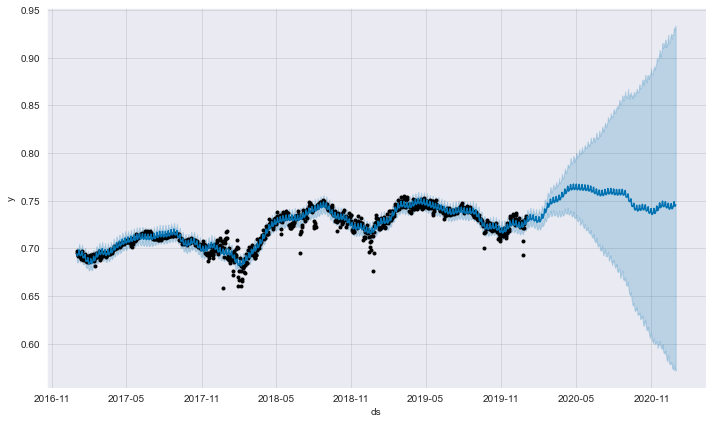

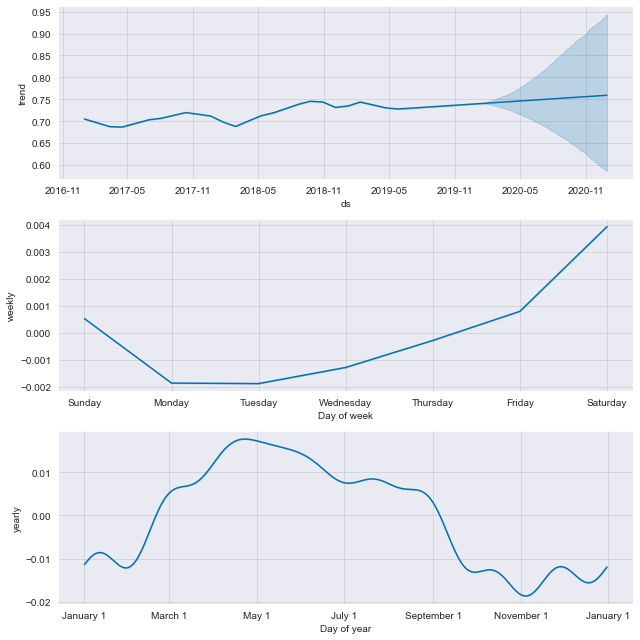

In [78]:
# Ploteamos 
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

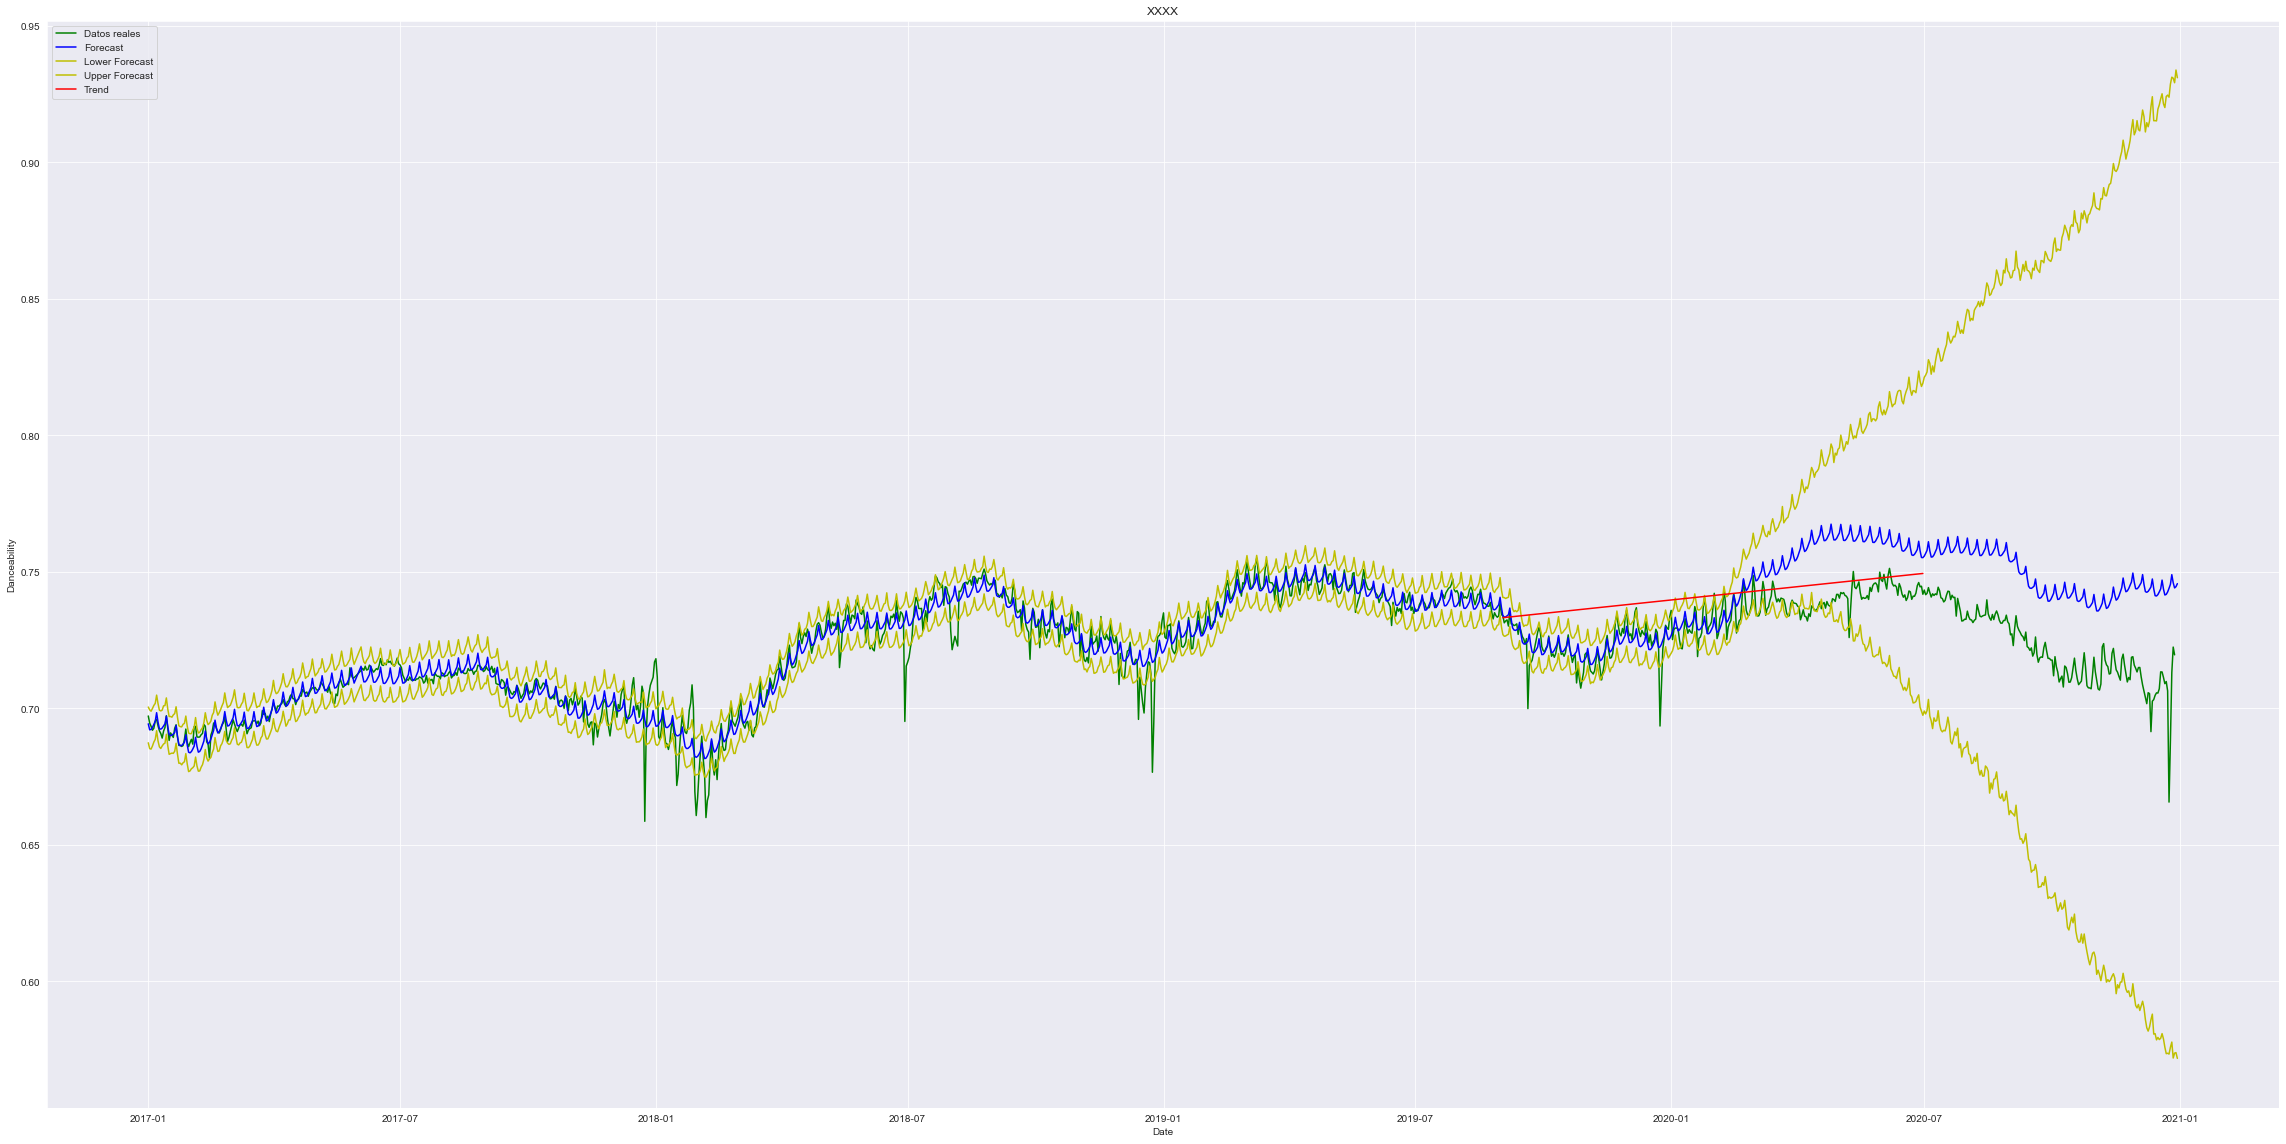

In [85]:
#Hacemos una nueva gráfico y metemos los datos reales
# Comparamos con datos reales

# dfpro_danceability_all.set_index('ds', inplace=True)
# dfpro_danceability_all.index = pd.to_datetime(dfpro_danceability_all.index)

forecast_pandemia = forecast[(forecast['ds'] > '2019-09-01') & (forecast['ds'] < '2020-07-01')]

plt.figure(figsize=(40, 20))
plt.plot(dfpro_danceability_all, 'g-')
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.plot(forecast['ds'], forecast['yhat_lower'], 'y-')
plt.plot(forecast['ds'], forecast['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Danceability')
plt.title('XXXX');
plt.show()

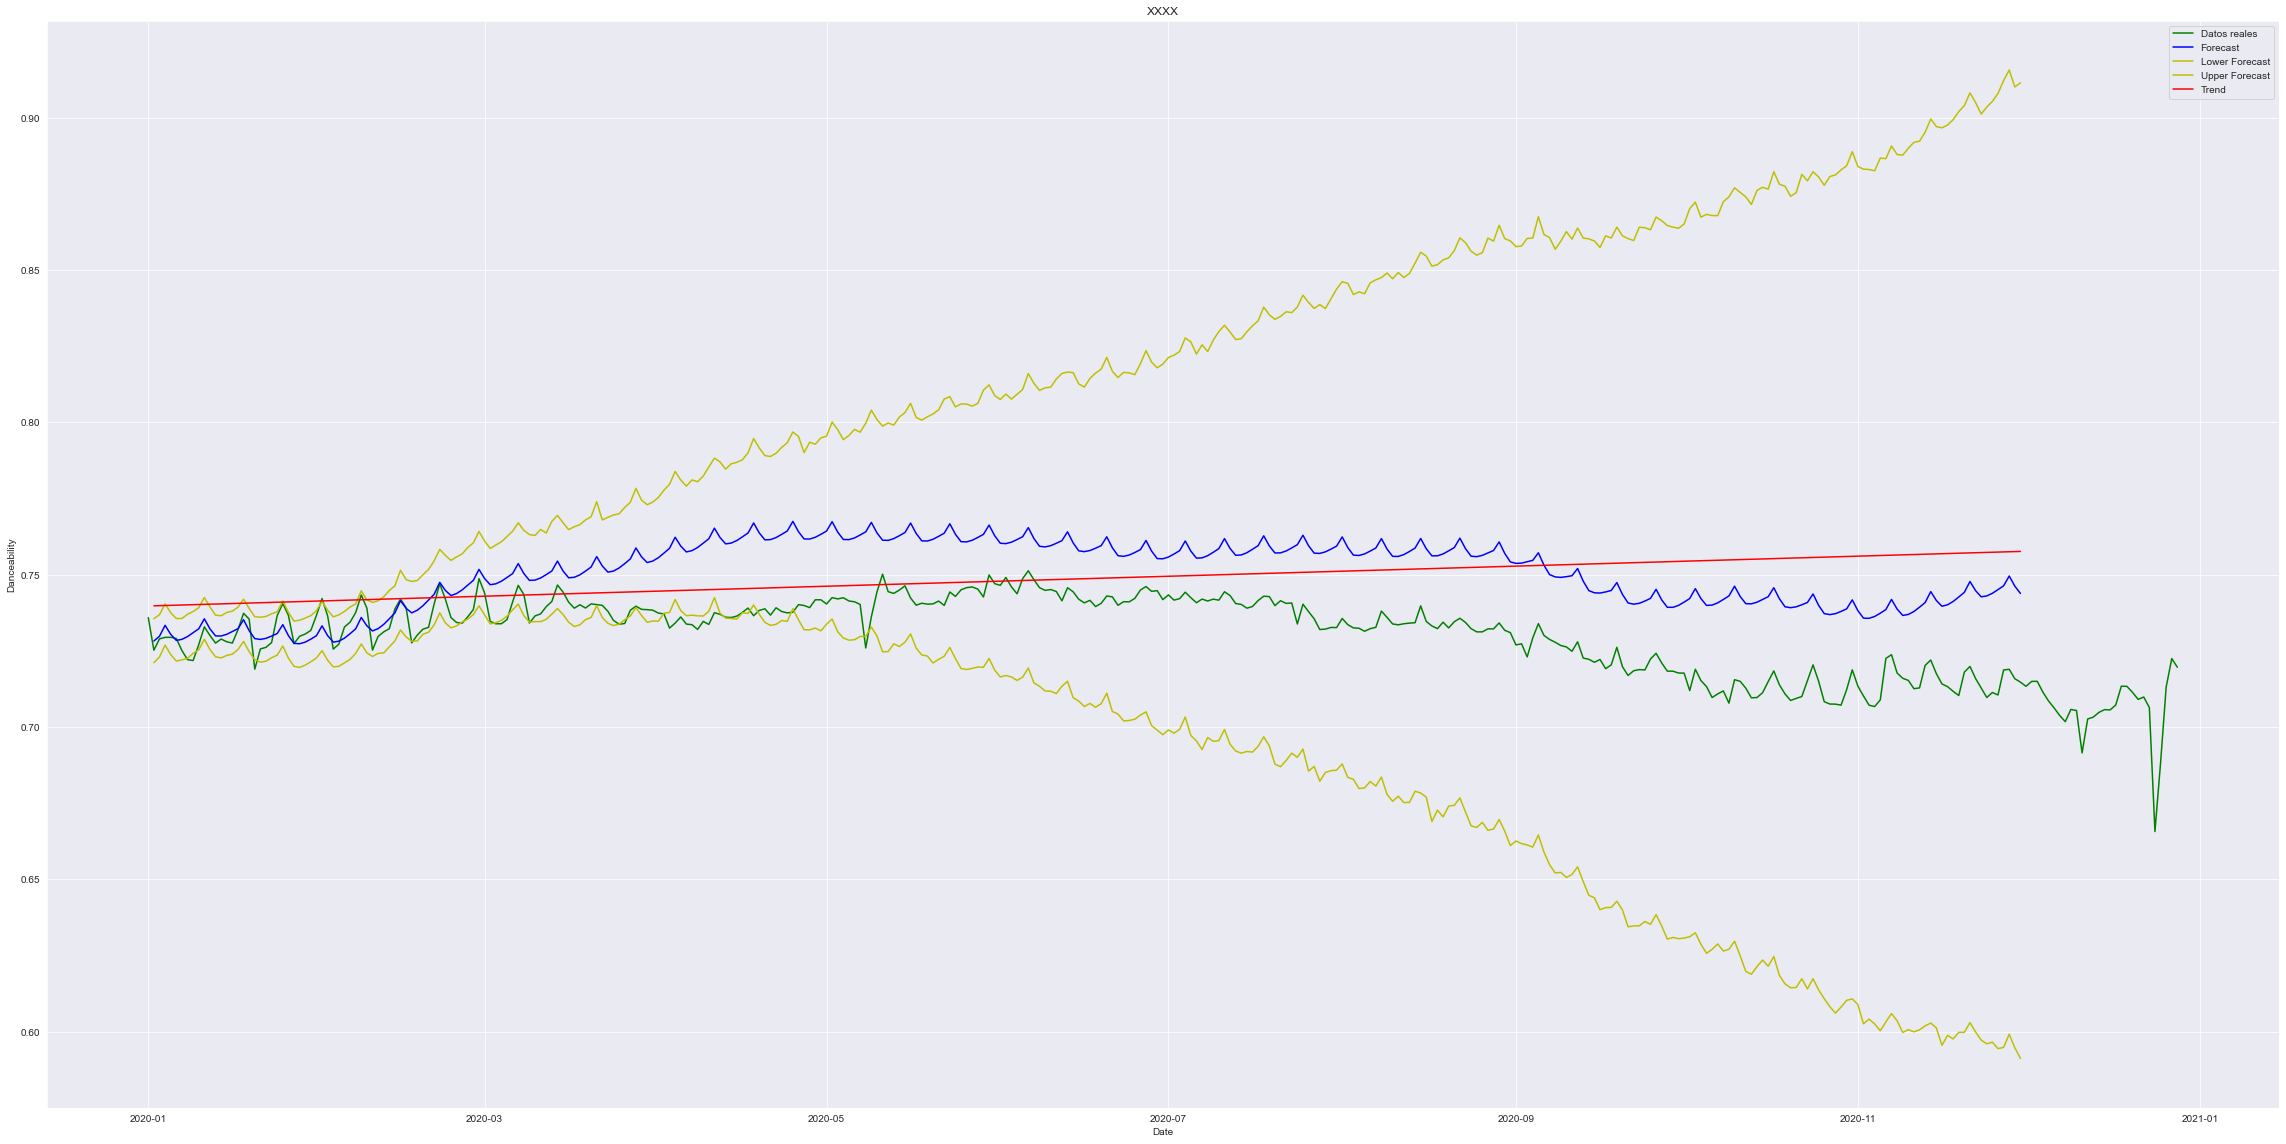

In [90]:
forecast_pandemia = forecast[(forecast['ds'] > '2020-01-01') & (forecast['ds'] < '2020-12-01')]

#dfpro_danceability_2020.set_index('ds', inplace=True)
#dfpro_danceability_2020.index = pd.to_datetime(dfpro_danceability_2020.index)
                             
plt.figure(figsize=(40, 20))
plt.plot(dfpro_danceability_2020, 'g-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat'], 'b-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_lower'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Danceability')
plt.title('XXXX');
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


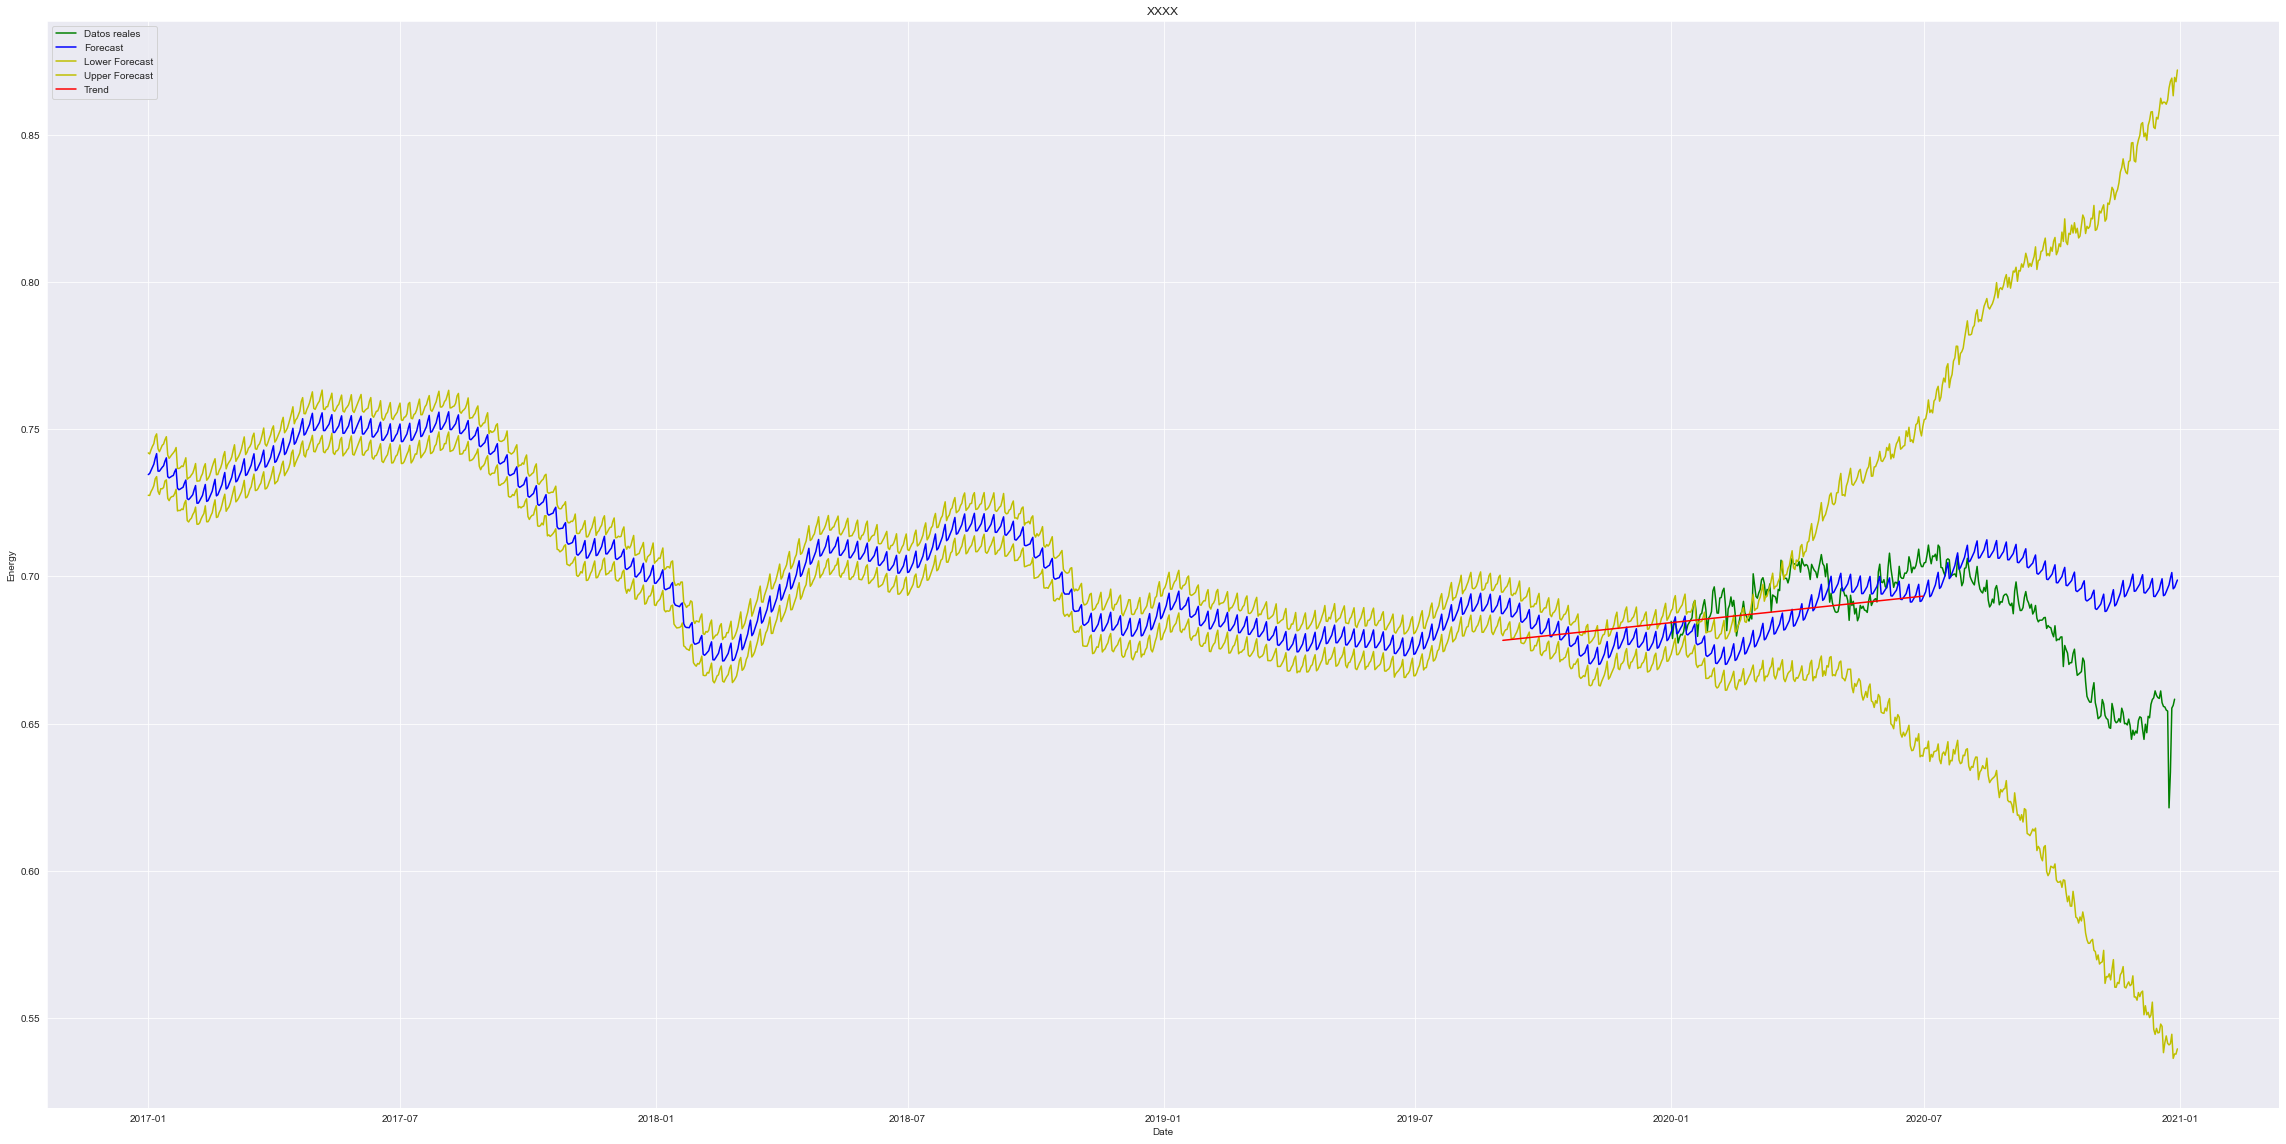

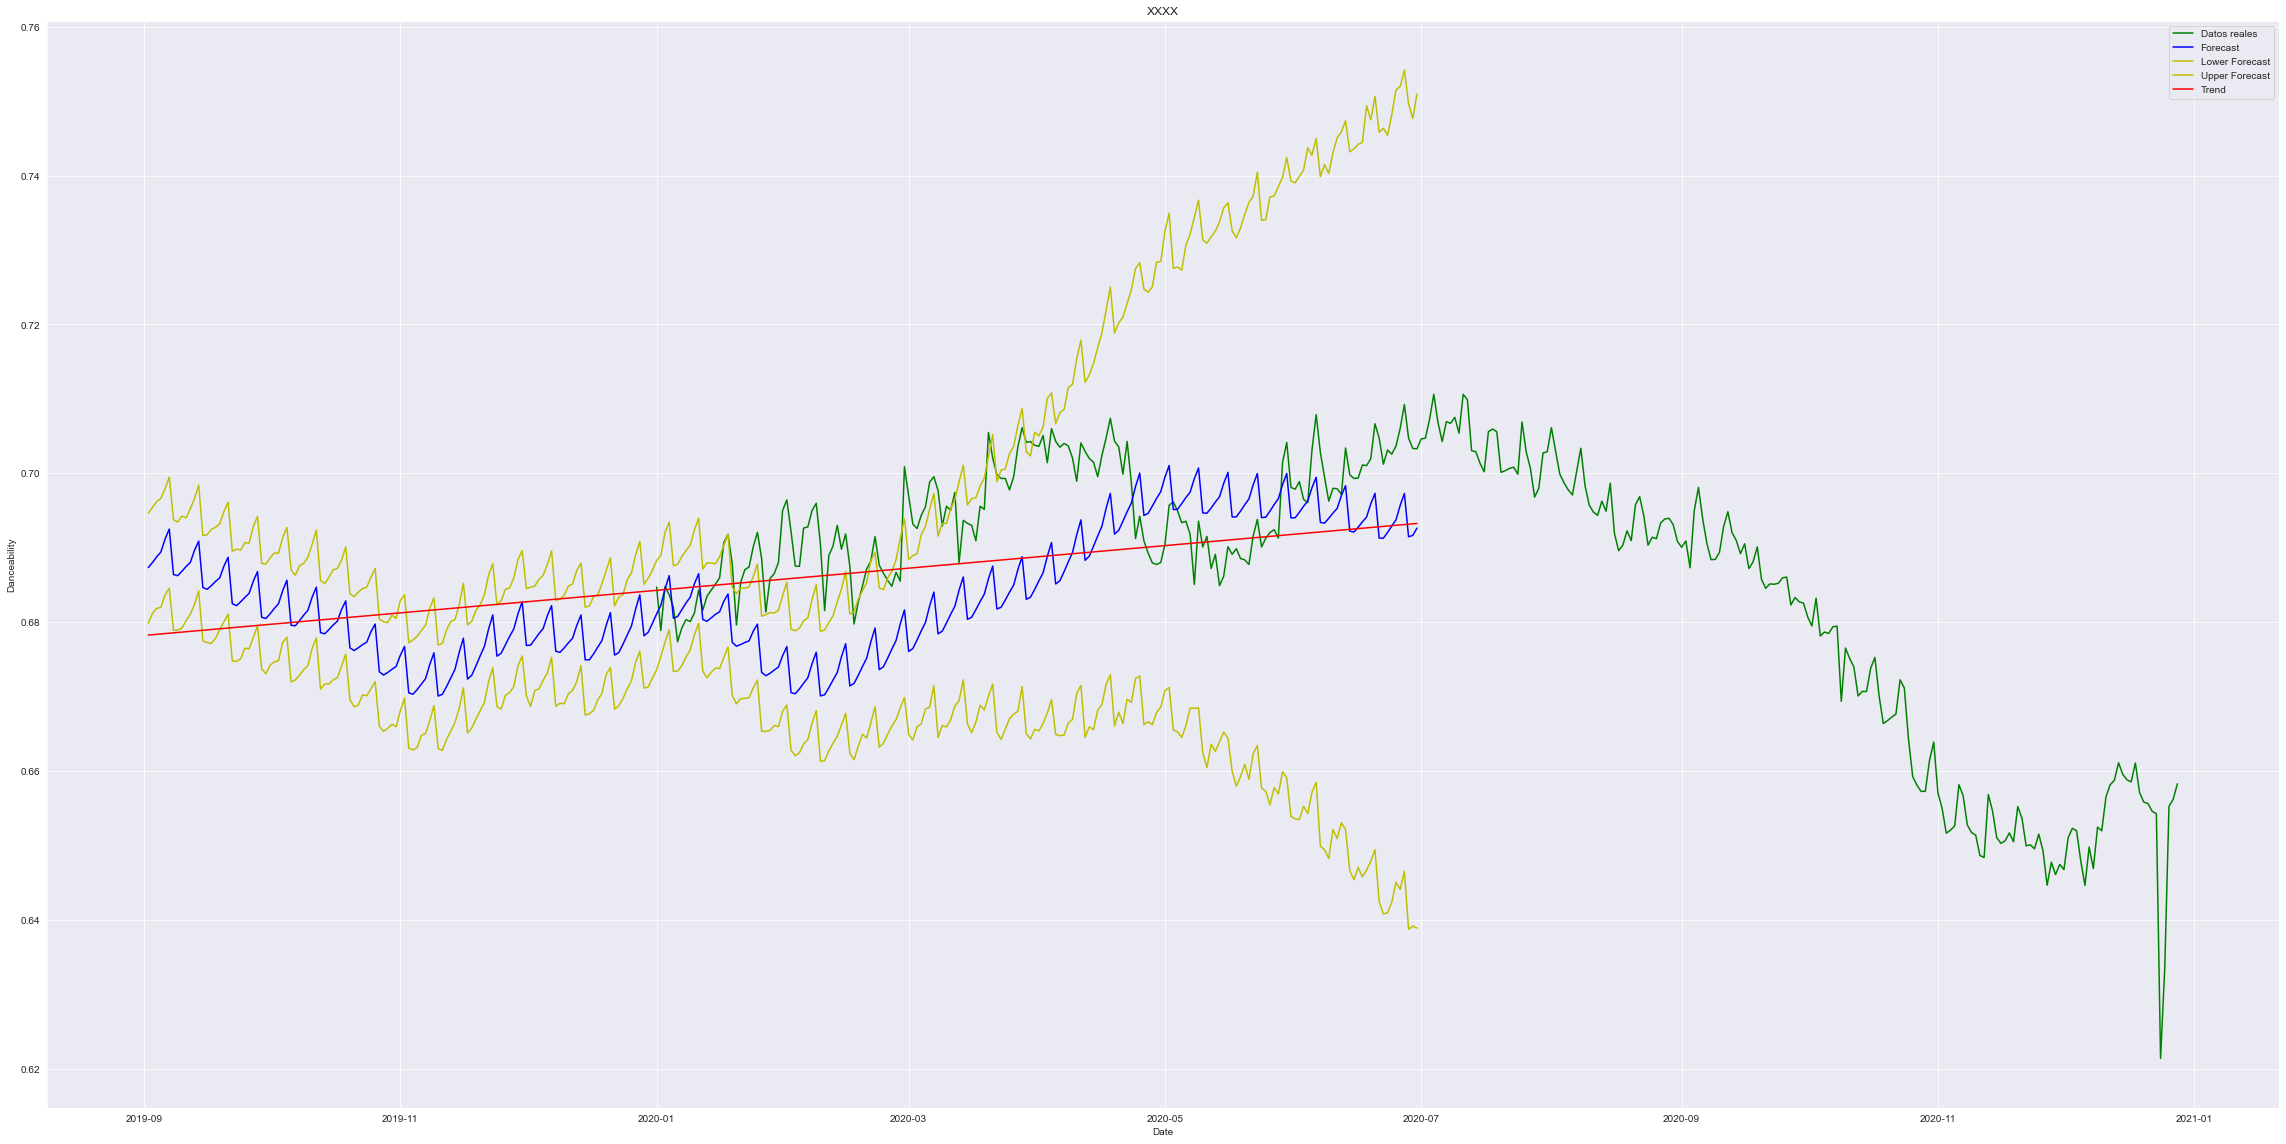

In [62]:
# Probamos con otra feature ENERGY

# Cogemos solo de las features que queremos
dfpro_energy = df_timeseries_prophet[df_timeseries_prophet['features'] == 'energy']
dfpro_energy_2020 = df_timeseries_prophet_2020[df_timeseries_prophet_2020['features'] == 'energy']


dfpro_energy = dfpro_energy.drop(columns=['Unnamed: 0', 'features']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False).reset_index()
dfpro_energy_2020 = dfpro_energy_2020.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
dfpro_energy.dtypes

# Entrenamos modelo
m = Prophet()
m.fit(dfpro_energy)
# Hacemos las predicciones para el 2021
future = m.make_future_dataframe(periods=365)
future.tail()
# Hacemos el forecast completo
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

dfpro_energy_2020.set_index('ds', inplace=True)
dfpro_energy_2020.index = pd.to_datetime(dfpro_energy_2020.index)

forecast_pandemia = forecast[(forecast['ds'] > '2019-09-01') & (forecast['ds'] < '2020-07-01')]

plt.figure(figsize=(40, 20))
plt.plot(dfpro_energy_2020, 'g-')
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.plot(forecast['ds'], forecast['yhat_lower'], 'y-')
plt.plot(forecast['ds'], forecast['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Energy')
plt.title('XXXX');
plt.show()


plt.figure(figsize=(40, 20))
plt.plot(dfpro_energy_2020, 'g-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat'], 'b-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_lower'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Danceability')
plt.title('XXXX');
plt.show()

## Por mes

In [233]:
df_timeseries_prophet_month = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYMONTH.csv", sep = ',', parse_dates=['year_month'])
print('Tamaño inicial: ', df_timeseries_prophet_month.shape)
df_timeseries_prophet_month_2020 = df_timeseries_prophet_month[(df_timeseries_prophet_month['year_month'].dt.year == 2020)]
df_timeseries_prophet_month_2020

Tamaño inicial:  (528, 4)


,Unnamed: 0,year_month,feature_media_month,features
36,36,2020-01-01,0.377326,length
37,37,2020-02-01,0.375641,length
38,38,2020-03-01,0.367625,length
39,39,2020-04-01,0.369793,length
40,40,2020-05-01,0.371047,length
...,...,...,...,...
523,43,2020-08-01,0.573212,tempo
524,44,2020-09-01,0.586658,tempo
525,45,2020-10-01,0.570874,tempo
526,46,2020-11-01,0.570003,tempo


In [234]:
# Cargamos archivo
df_timeseries_prophet_month = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYMONTH.csv", sep = ',', parse_dates=['year_month'])
print('Tamaño inicial: ', df_timeseries_prophet_month.shape)
df_timeseries_prophet_month_2020 = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYMONTH.csv", sep = ',', parse_dates=['year_month'])
print('Tamaño inicial: ', df_timeseries_prophet_month_2020.shape)

# Quitamos el 2020, porque es lo que queremos que prediga
df_timeseries_prophet_month = df_timeseries_prophet_month[(df_timeseries_prophet_month['year_month'].dt.year != 2020)]
df_timeseries_prophet_month_2020 = df_timeseries_prophet_month_2020[(df_timeseries_prophet_month_2020['year_month'].dt.year == 2020)]

# Cogemos solo de las features que queremos
dfpro_danceability = df_timeseries_prophet_month[df_timeseries_prophet_month['features'] == 'danceability']
dfpro_danceability_2020 = df_timeseries_prophet_month_2020[df_timeseries_prophet_month_2020['features'] == 'danceability']

# Preparamos
dfpro_danceability = dfpro_danceability.reset_index().drop(columns=['Unnamed: 0','features', 'index']).rename(columns = {
    'feature_media_month': 'y', 'year_month': 'ds'}, inplace = False)
dfpro_danceability_2020 = dfpro_danceability_2020.reset_index().drop(columns=['Unnamed: 0','features', 'index']).rename(columns = {
    'feature_media_month': 'y', 'year_month': 'ds'}, inplace = False)
print(dfpro_danceability.dtypes)
print(dfpro_danceability_2020.dtypes)
dfpro_danceability_2020

Tamaño inicial:  (528, 4)
Tamaño inicial:  (528, 4)
ds    datetime64[ns]
y            float64
dtype: object
ds    datetime64[ns]
y            float64
dtype: object


,ds,y
0,2020-01-01,0.729841
1,2020-02-01,0.736067
2,2020-03-01,0.738858
3,2020-04-01,0.736961
4,2020-05-01,0.742680
5,2020-06-01,0.744054
6,2020-07-01,0.739802
7,2020-08-01,0.733600
8,2020-09-01,0.723533
9,2020-10-01,0.712662


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


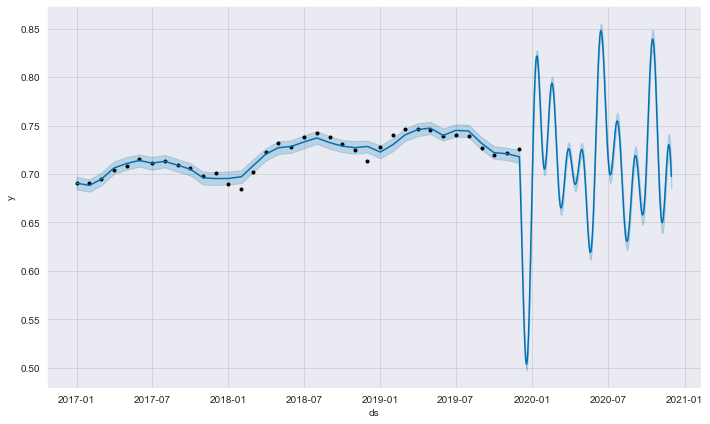

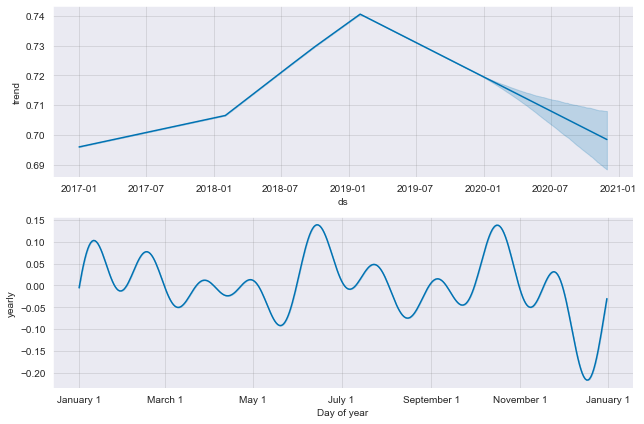

In [235]:
# Probamos el Prophet forecasting
from fbprophet import Prophet

# Entrenamos modelo
m = Prophet()
m.fit(dfpro_danceability)

# Hacemos las predicciones para el 2021
future = m.make_future_dataframe(periods=365)
future.tail()

# Hacemos el forecast completo
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Ploteamos 
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

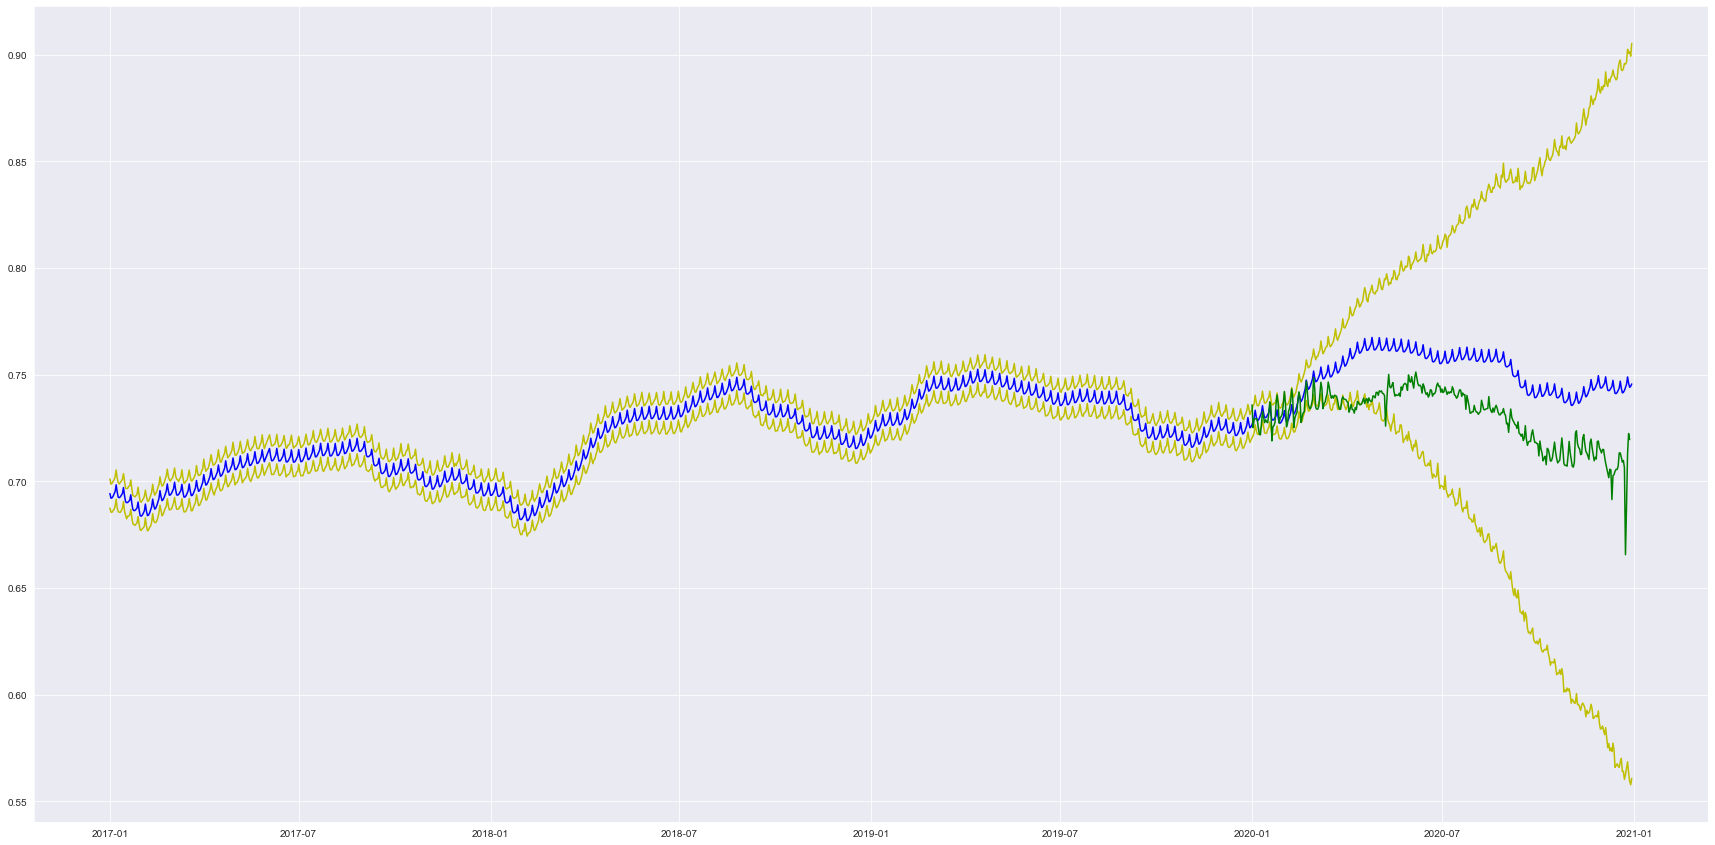

In [250]:
# dfpro_danceability_2020.set_index('ds', inplace=True)
# dfpro_danceability_2020.index = pd.to_datetime(dfpro_danceability_2020.index)

plt.figure(figsize=(30, 15))
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.plot(forecast['ds'], forecast['yhat_lower'], 'y-')
plt.plot(forecast['ds'], forecast['yhat_upper'], 'y-')
plt.plot(dfpro_danceability_2020, 'g-')
plt.show()

# First exploration

En el siguiente gráfico vemos que en el aumento de streamstotales es progresivo en años, esto puede significar que se escucha más Spotify, o que según pasan los años se escuchan más número de veces las canciones del top200, en vez de otras, es decir, hay menos variedad en el Top200. Como la idea es que en nuestros análisis se usen datos ponderados respecto al año, no debería afectar este tema.

In [2]:
data_ana_corona.columns

Index(['Track Name', 'Artist', 'Streams', 'date', 'spotify_id', 'year',
       'Streamstotal', 'album', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
       'time_signature', 'release_date_year', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10',
       'genres_together', 'artist_id', 'artist_followers', 'artist_popularity',
       'streamstotal_weights'],
      dtype='object')

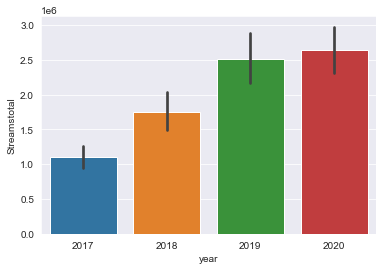

In [3]:
data_ana_corona.groupby(['year']).sum()
sns.barplot(x="year", y="Streamstotal", data=data_ana_corona)

Si hacemos un conteo del número de canciones únicas por año. De primeras es curioso que el 2019 tenga menos canciones únicas en el top200, ¿se ha escuchcado más de lo mismo?

In [4]:
data_ana_corona.groupby(['year']).count()

,Track Name,Artist,Streams,date,spotify_id,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,380,352,283,226,181,88,38,22,7,1,380,384,384,384,384
2018,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,399,369,311,210,122,50,20,10,5,1,399,401,401,401,401
2019,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,328,261,166,106,50,30,11,1,0,372,372,372,372,372
2020,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,419,361,279,104,70,23,7,3,0,0,419,424,424,424,424


Ojo! puede ocurrir que una misma canción de un artista se repita, porque está en el top200 dos años diferentes y albunes diferentes (por ejemplo, si se ha hecho un recopilatorio otro año). He decidido ignorarlo porque va a afectar poco en los análisis

In [5]:
data_ana_corona[data_ana_corona['Artist'] == 'KAROL G']

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
0,Tusa,KAROL G,432730,2020-03-13,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982,Tusa,2019-11-07,0.324972,0.908163,0.29500,0.803,0.715,0.000134,0.0574,0.911425,0.397800,0.574,0.258160,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.017033
61,Follow,KAROL G,152745,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,6900319,Follow,2020-04-01,0.330442,0.765306,0.66700,0.735,0.787,0.000006,0.0721,0.875476,0.198031,0.455,0.711901,4,2020-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.006159
102,Créeme,KAROL G,75552,2019-03-13,1mT47pKLXUwPYGwB91GcNz,2019,3272814,Créeme,2018-11-02,0.354546,0.734694,0.15400,0.715,0.872,0.000146,0.1100,0.904169,0.045599,0.682,0.230459,4,2018-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.003510
153,Culpables,KAROL G,56202,2019-03-13,6q8Lb50EtqNeeJXXe8mMAH,2019,2136436,Culpables,2018-09-14,0.390787,0.693878,0.27900,0.728,0.801,0.000005,0.1430,0.922521,0.065287,0.416,0.451744,4,2018-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.002291
204,Punto G,KAROL G,51826,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.275291,0.622449,0.00796,0.787,0.751,0.000139,0.0857,0.863559,0.091633,0.926,0.691617,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.002070
232,Punto G,KAROL G,122406,2019-05-03,2E82gORVSA7UMEz5M1IP3b,2019,1151711,OCEAN,2019-05-03,0.279327,0.622449,0.00938,0.791,0.746,0.000117,0.1250,0.864281,0.097713,0.905,0.691837,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.001235
242,Créeme,KAROL G,64151,2019-05-03,4EKZsrsCKyqr64FBHLc0DU,2019,600475,OCEAN,2019-05-03,0.359162,0.673469,0.12600,0.715,0.874,0.000162,0.1050,0.901707,0.045744,0.652,0.230833,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.000644
252,Love With A Quality,KAROL G,46140,2019-05-03,6F9DPkjP6Tbz9FLgLyYgX6,2019,46140,OCEAN,2019-05-03,0.383438,0.622449,0.06460,0.849,0.752,0.000003,0.1060,0.895798,0.177765,0.586,0.257712,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.000049
253,Culpables,KAROL G,41255,2019-05-03,4RGKft6YTTWHjpQeRIInuS,2019,362564,OCEAN,2019-05-03,0.396773,0.612245,0.28700,0.728,0.812,0.000003,0.1300,0.920059,0.087001,0.418,0.451544,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.000389
263,Ocean,KAROL G,31994,2019-05-03,6qoIFQfdmaQF9A1gb67tR7,2019,541126,OCEAN,2019-05-03,0.209542,0.744898,0.93300,0.727,0.482,0.000000,0.3880,0.815791,0.132889,0.487,0.083410,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.89899,0.000580


# Pregunta 0: ¿Ha cambiado la cantidad de música que se escucha en spotify?

Se puede confirmar que sí, pero cuidado, porque puede ocurrir que Spotify era usado por menos gente o que la gente escuchaba más variedad (hay que acordarse que los datos son del top200 y toda la música escuchada no está en el top200).

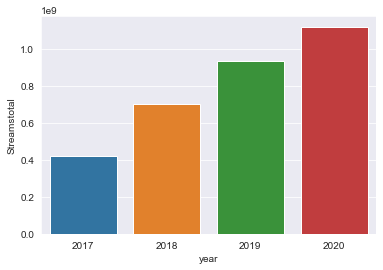

In [6]:
data_ana_streams = data_ana_corona.loc[:, ['year', 'Streamstotal']]
data_year_streams = data_ana_streams.groupby(['year']).sum()
data_year_streams.reset_index(inplace=True)


sns.barplot(x="year", y="Streamstotal", data=data_year_streams)

# Pregunta 1: ¿Ha cambiado el tipo de música quehemos escuchado en el confinamiento respecto a otros años? Con ayuda de las features

Llamamos Features a las características de cada canción y que nos dan información de ella. En la web de Spotify explica qué significa cada feature y cual es su distribución en todas sus canciones (https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). **Más adelante explicamos lo que significa cada feature.**

Lo primero es ver una aproximación de las medias sin ponderar de las features, a ver si tienen sentido. Parece que sí, y todas están entre 0 y 1 como hicimos en la extarcción

Ploteamos algunas medias de una feature concreta (sin ponderar) para ver qué se ve, y podemos ver algunas tendencias, eso sí, ligeras

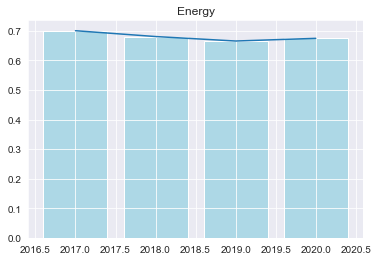

Text(0.5, 1.0, 'Acousticness')

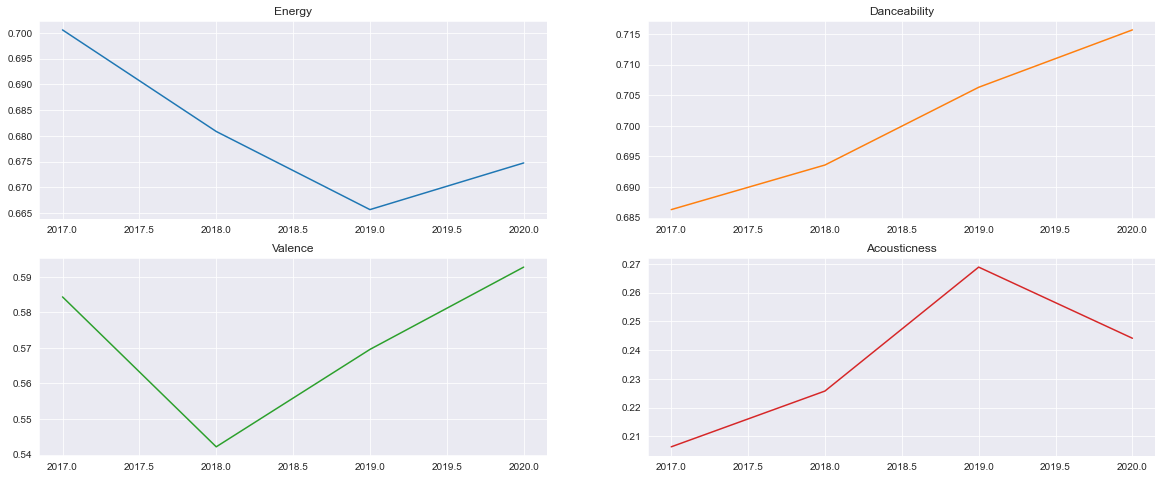

In [7]:
data_features_means_nopon = data_ana_corona.groupby(['year']).mean()
data_features_means_nopon.reset_index(inplace=True)

x_years = data_features_means_nopon["year"]

fig, ax = plt.subplots()
ax.bar(x_years,data_features_means_nopon["energy"], color="lightblue", zorder=0)
# sns.regplot(x=x, y=y, ax=ax)
ax.plot(x_years, data_features_means_nopon["energy"])
ax.set_ylim(0, None)
ax.set_title('Energy')
plt.show()

'''fig, axs = plt.subplots(3)
fig.suptitle('Comparative')
axs[0].plot(data_year_means["year"], data_year_means["energy"])
axs[1].plot(data_year_means["year"], data_year_means["danceability"])
axs[2].plot(data_year_means["year"], data_year_means["valence"])'''

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 8)
axs[0, 0].plot(x_years, data_features_means_nopon["energy"])
axs[0, 0].set_title('Energy')
axs[0, 1].plot(x_years, data_features_means_nopon["danceability"], 'tab:orange')
axs[0, 1].set_title('Danceability')
axs[1, 0].plot(x_years, data_features_means_nopon["valence"], 'tab:green')
axs[1, 0].set_title('Valence')
axs[1, 1].plot(x_years, data_features_means_nopon["acousticness"], 'tab:red')
axs[1, 1].set_title('Acousticness')

Antes de analizar nada vamos a ponderar los datos a ver si hay diferencia. Para ello hemos hecho una función para calcular las medias ponderadas de cada feature por años, para poner en gráficos fácilmente después.

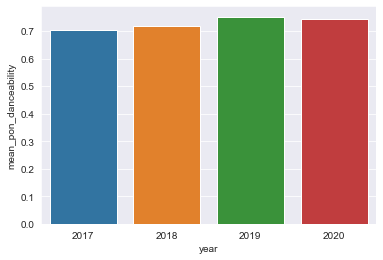

In [76]:
 def mediapon_features (feature):
    data_dance_compar = data_ana_corona.loc[:, ['year', feature, 'streamstotal_weights']]
    data_dance_compar["mean_pon_" + feature] = data_dance_compar[feature] * data_dance_compar['streamstotal_weights']
    media_dance_compar = data_dance_compar.groupby(['year']).sum()
    media_dance_compar.reset_index(inplace=True)
    media_dance_compar = media_dance_compar.drop(columns=[feature])
    return media_dance_compar

# Prueba con danceability
media_dance_pon = mediapon_features ('danceability')
sns.barplot(x="year", y="mean_pon_danceability", data=media_dance_pon)

Hacemos la comparación a ver si hay diferencias. Hay una diferencia sutil, pero que en algunos casos puede variar la tendencia claramente así que vemos importante ponderar.

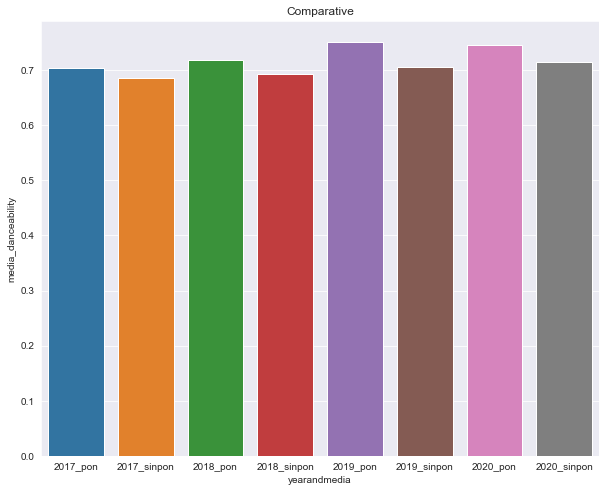

In [78]:
# Comparar medias sin y con ponderación
comparar_pon_ysinpon = pd.merge(data_features_means_nopon, media_dance_pon, how='right', on="year")
comparar_pon_ysinpon = comparar_pon_ysinpon[['year', 'danceability', 'mean_pon_danceability']]

#Hago un melt de la tabla porque quiero comparar
comparar_pon_ysinpon2 = pd.melt(comparar_pon_ysinpon,
        id_vars = ['year'],
       value_vars = ['danceability', "mean_pon_danceability"],
       value_name = 'media_danceability')

list_x = ['2017_sinpon', '2018_sinpon', '2019_sinpon', '2020_sinpon', '2017_pon', '2018_pon', '2019_pon', '2020_pon']
comparar_pon_ysinpon2['yearandmedia'] = list_x
comparar_pon_ysinpon2 =  comparar_pon_ysinpon2.drop(columns=['variable', 'year'])
comparar_pon_ysinpon2 = comparar_pon_ysinpon2.sort_values('yearandmedia')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparative')
sns.barplot(x="yearandmedia", y ='media_danceability', data=comparar_pon_ysinpon2)


Ahora vamos a plotear todas las features para ver su tendencia con la ponderación hecha, pero vamos a aprovechar esta visualización y añadimos los datos para comparar el PERIODO PANDEMIA y eL PERIODO NORMAL. Para ello hacemos lo mismo que hemos hecho en las celdas anteriores pero con el PERIODO NORMAL

In [79]:
# EXTRAER DATOS DE PERIODO NORMAL

# Cargamos el dataframe final de extracción, donde están todas las canciones
data_ana_normal = pd.read_csv("data_global_normalperiod.csv", sep = ',', parse_dates=['release_date_year'])
print('Tamaño inicial: ',data_ana_normal.shape)

# Quitamos algunas columnas que no usaremos y sobran
data_ana_normal = data_ana_normal.drop(columns=['Unnamed: 0', 'Position'])
print('Tamaño quitando columnas que sobran: ', data_ana_normal.shape)

# Quitamos los duplicados por canciones, no nos sirven de momento para los análisis
data_ana_normal = data_ana_normal.drop_duplicates(subset='spotify_id').copy()
print('Tamaño sin duplicados de canciones: ', data_ana_normal.shape)

# Para analizar teniendo en cuenta los streams totales y que esté ponderado, calculamos los pesos de cada canción respecto a los streams totales
# Importante hacerlo una vez quitados los duplicados
# Versión optimizada corta y sin warnings

data_ana_normal_2020 = data_ana_normal.loc[data_ana_normal['year'] == 2020]
data_ana_normal_2019 = data_ana_normal.loc[data_ana_normal['year'] == 2019]
data_ana_normal_2018 = data_ana_normal.loc[data_ana_normal['year'] == 2018]
data_ana_normal_2017 = data_ana_normal.loc[data_ana_normal['year'] == 2017]

data_ana_normal.loc[data_ana_normal.year == 2020, 'streamstotal_weights'] = data_ana_normal_2020['Streamstotal']/data_ana_normal_2020['Streamstotal'].sum()
data_ana_normal.loc[data_ana_normal.year == 2019, 'streamstotal_weights'] = data_ana_normal_2019['Streamstotal']/data_ana_normal_2019['Streamstotal'].sum()
data_ana_normal.loc[data_ana_normal.year == 2018, 'streamstotal_weights'] = data_ana_normal_2018['Streamstotal']/data_ana_normal_2018['Streamstotal'].sum()
data_ana_normal.loc[data_ana_normal.year == 2017, 'streamstotal_weights'] = data_ana_normal_2017['Streamstotal']/data_ana_normal_2017['Streamstotal'].sum()

# COMPROBACIONES: Deberían sumar 1 los pesos de cada año
print('Peso 2020: ', data_ana_normal.loc[data_ana_normal['year'] == 2020, 'streamstotal_weights'].sum())
print('Peso 2019: ', data_ana_normal.loc[data_ana_normal['year'] == 2019, 'streamstotal_weights'].sum())
print('Peso 2018: ', data_ana_normal.loc[data_ana_normal['year'] == 2018, 'streamstotal_weights'].sum())
print('Peso 2017: ', data_ana_normal.loc[data_ana_normal['year'] == 2017, 'streamstotal_weights'].sum())

#Ver cómo sale
data_ana_normal[data_ana_normal['Track Name'] == 'Punto G']

# Exportamos un archivo CSV el resultado para tenerlo ya listo en otros análisis
data_ana_normal.to_csv("data_ana_normalperiod.csv", sep = ',')

#Revisamos los tipos de datos:
data_ana_normal.head(2)

Tamaño inicial:  (48059, 39)
Tamaño quitando columnas que sobran:  (48059, 37)
Tamaño sin duplicados de canciones:  (1559, 37)
Peso 2020:  1.0
Peso 2019:  1.0
Peso 2018:  1.0
Peso 2017:  1.0


/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,Period,streamstotal_weights
0,Tusa,KAROL G,432554,2020-01-08,7k4t7uLgtOxPwTpFmtJNTY,2020,33218824,Tusa,2019-11-07,0.370381,0.957895,0.295,0.803,0.715,0.000134,0.0574,0.910438,0.520652,0.574,0.294453,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11614405,0.888889,NormalPeriod,0.028869
62,Ocean,KAROL G,29680,2020-01-19,6qoIFQfdmaQF9A1gb67tR7,2020,90300,OCEAN,2019-05-03,0.262716,0.778947,0.933,0.727,0.482,0.000000,0.3880,0.814908,0.173930,0.487,0.128252,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11614405,0.888889,NormalPeriod,0.000078


Rehago la función para poder sacar también el periodo NORMAL

In [82]:
# Rehago la función
def mediapon_features (feature, dataframe_period):
    media_compar = dataframe_period.loc[:, ['year', feature, 'streamstotal_weights']]
    media_compar["mean_pon_" + feature] = media_compar[feature] * media_compar['streamstotal_weights']
    media_compar = media_compar.groupby(['year']).sum()
    media_compar.reset_index(inplace=True)
    media_compar = media_compar.drop(columns=[feature])
    return media_compar


Preparamos datos para extraer de cada periodo y tenerlos en un dataframe listo paa luego plotear.

In [87]:
features = ['length',
            'popularity',
            'acousticness',
            'danceability',
            'energy',
            'instrumentalness',
            'liveness',
            'loudness',
            'speechiness',
            'valence',
            'tempo']

# Creo un diccionario para meter todos los dataframes con los datos ponderados
dic_features_means_corona = {}
for x in features:
    dic_features_means_corona[x] = mediapon_features (x, data_ana_corona)
    
dic_features_means_normal = {}
for x in features:
    dic_features_means_normal[x] = mediapon_features (x, data_ana_normal)
    
media_length_corona = dic_features_means_corona['length']['mean_pon_length']
media_popularity_corona = dic_features_means_corona['popularity']['mean_pon_popularity']
media_acousticness_corona = dic_features_means_corona['acousticness']['mean_pon_acousticness']
media_danceability_corona = dic_features_means_corona['danceability']['mean_pon_danceability']
media_energy_corona = dic_features_means_corona['energy']['mean_pon_energy']
media_instrumentalness_corona = dic_features_means_corona['instrumentalness']['mean_pon_instrumentalness']
media_liveness_corona = dic_features_means_corona['liveness']['mean_pon_liveness']
media_loudness_corona = dic_features_means_corona['loudness']['mean_pon_loudness']
media_speechiness_corona = dic_features_means_corona['speechiness']['mean_pon_speechiness']
media_valence_corona = dic_features_means_corona['valence']['mean_pon_valence']
media_tempo_corona = dic_features_means_corona['tempo']['mean_pon_tempo']

media_length_normal = dic_features_means_normal ['length']['mean_pon_length']
media_popularity_normal  = dic_features_means_normal ['popularity']['mean_pon_popularity']
media_acousticness_normal  = dic_features_means_normal ['acousticness']['mean_pon_acousticness']
media_danceability_normal  = dic_features_means_normal ['danceability']['mean_pon_danceability']
media_energy_normal  = dic_features_means_normal ['energy']['mean_pon_energy']
media_instrumentalness_normal  = dic_features_means_normal ['instrumentalness']['mean_pon_instrumentalness']
media_liveness_normal  = dic_features_means_normal ['liveness']['mean_pon_liveness']
media_loudness_normal  = dic_features_means_normal ['loudness']['mean_pon_loudness']
media_speechiness_normal  = dic_features_means_normal ['speechiness']['mean_pon_speechiness']
media_valence_normal  = dic_features_means_normal ['valence']['mean_pon_valence']
media_tempo_normal  = dic_features_means_normal ['tempo']['mean_pon_tempo']

# Probamos
print(media_length_corona)
print(media_tempo_normal)

0    0.376435
1    0.356821
2    0.373368
3    0.335215
Name: mean_pon_length, dtype: float64
0    0.425404
1    0.425585
2    0.417816
3    0.415019
Name: mean_pon_tempo, dtype: float64


## Visualizamos medias y resultados

Ploteamos todos los gráficos para ver la tendencia en PERIODO PANDEMIA y en PERIODO NORMAL

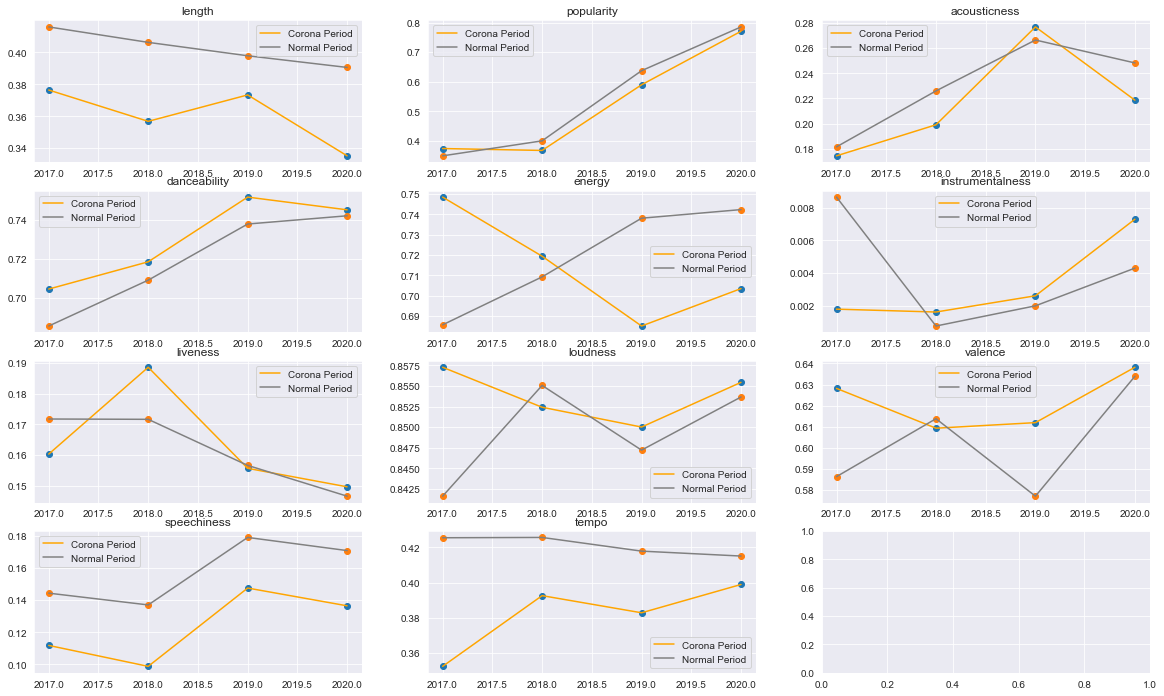

In [89]:
x_years = dic_features_means_corona['length']['year']

fig, axs = plt.subplots(4, 3)
fig.set_size_inches(20, 12)

graph_1 = axs[0, 0]
graph_1.plot(x_years, media_length_corona,label='Corona Period', color = 'orange') # PERIODO CORONA
graph_1.plot(x_years, media_length_normal,label='Normal Period', color = 'grey') # PERIODO NORMAL
graph_1.scatter(x_years, media_length_corona)
graph_1.scatter(x_years, media_length_normal)
graph_1.set_title('length')
graph_1.legend()

graph_2 = axs[0, 1]
graph_2.plot(x_years, media_popularity_corona,label='Corona Period', color = 'orange')
graph_2.plot(x_years, media_popularity_normal,label='Normal Period', color = 'grey')
graph_2.scatter(x_years, media_popularity_corona)
graph_2.scatter(x_years, media_popularity_normal)
graph_2.set_title('popularity')
graph_2.legend()

graph_3 = axs[0, 2]
graph_3.plot(x_years, media_acousticness_corona,label='Corona Period', color = 'orange')
graph_3.plot(x_years, media_acousticness_normal,label='Normal Period', color = 'grey')
graph_3.scatter(x_years, media_acousticness_corona)
graph_3.scatter(x_years, media_acousticness_normal)
graph_3.set_title('acousticness')
graph_3.legend()

graph_4 = axs[1, 0]
graph_4.plot(x_years, media_danceability_corona,label='Corona Period', color = 'orange')
graph_4.plot(x_years, media_danceability_normal,label='Normal Period', color = 'grey')
graph_4.scatter(x_years, media_danceability_corona)
graph_4.scatter(x_years, media_danceability_normal)
graph_4.set_title('danceability')
graph_4.legend()

graph_5 = axs[1, 1]
graph_5.plot(x_years, media_energy_corona,label='Corona Period', color = 'orange')
graph_5.plot(x_years, media_danceability_normal,label='Normal Period', color = 'grey')
graph_5.scatter(x_years, media_energy_corona)
graph_5.scatter(x_years, media_danceability_normal)
graph_5.set_title('energy')
graph_5.legend()

graph_6 = axs[1, 2]
graph_6.plot(x_years, media_instrumentalness_corona,label='Corona Period', color = 'orange')
graph_6.plot(x_years, media_instrumentalness_normal,label='Normal Period', color = 'grey')
graph_6.scatter(x_years, media_instrumentalness_corona)
graph_6.scatter(x_years, media_instrumentalness_normal)
graph_6.set_title('instrumentalness')
graph_6.legend()

graph_7 = axs[2, 0]
graph_7.plot(x_years, media_liveness_corona,label='Corona Period', color = 'orange')
graph_7.plot(x_years, media_liveness_normal,label='Normal Period', color = 'grey')
graph_7.scatter(x_years, media_liveness_corona)
graph_7.scatter(x_years, media_liveness_normal)
graph_7.set_title('liveness')
graph_7.legend()

graph_8 = axs[2, 1]
graph_8.plot(x_years, media_loudness_corona,label='Corona Period', color = 'orange')
graph_8.plot(x_years, media_loudness_normal,label='Normal Period', color = 'grey')
graph_8.scatter(x_years, media_loudness_corona)
graph_8.scatter(x_years, media_loudness_normal)
graph_8.set_title('loudness')
graph_8.legend()

graph_9 = axs[2, 2]
graph_9.plot(x_years, media_valence_corona,label='Corona Period', color = 'orange')
graph_9.plot(x_years, media_valence_normal,label='Normal Period', color = 'grey')
graph_9.scatter(x_years, media_valence_corona)
graph_9.scatter(x_years, media_valence_normal)
graph_9.set_title('valence')
graph_9.legend()


graph_10 = axs[3, 0]
graph_10.plot(x_years, media_speechiness_corona,label='Corona Period', color = 'orange')
graph_10.plot(x_years, media_speechiness_normal,label='Normal Period', color = 'grey')
graph_10.scatter(x_years, media_speechiness_corona)
graph_10.scatter(x_years, media_speechiness_normal)
graph_10.set_title('speechiness')
graph_10.legend()

graph_11 = axs[3, 1]
graph_11.plot(x_years, media_tempo_corona,label='Corona Period', color = 'orange')
graph_11.plot(x_years, media_tempo_normal,label='Normal Period', color = 'grey')
graph_11.scatter(x_years, media_tempo_corona)
graph_11.scatter(x_years, media_tempo_normal)
graph_11.set_title('tempo')
graph_11.legend()


Obtenemos un panorámica de si ha habido cambios en las features de las canciones repecto a años anteriores en el mismo Periodo Pandemia y el Periodo normal de control. Parece que sí hay cambios.

En algunos casos vemos que los datos son muy parecidos en el 2020 (en la pandemia), eso quiere decir que realmente ha afectado poco la pandemia(ejemplo: popularuity), sin embargo, pueden venir de valores diferentes respecto a años anteriores(ejemplo:liveness)

Por otro lado, las tendencias en años son parecidas en algunas features y otras no. en algunas esta tendencia se romoe justo en el año 2020 (ejemplo: acousticness) y en otra es antes o no es clara (ejemplo: energy)

Otro apunte, es que hay que tener en cuenta que pueden haber afectado circunstancias concretas en los periodo, por ejemplo, en el periodo normal está la navidad muy cerca.

Es difícil hacer un análisis preciso con estas gráficas por lo que camos a hacer un análisis feature por feature, con una mejor visualización y entrando en materia en la intepretación de las features.

# Análisis feature por feature

### Preparación

Creamos función para usar seaborn

In [92]:
def plot_features_analysis(feature):
    media_feature_corona = mediapon_features(feature, data_ana_corona)
    fig, axs = plt.subplots(ncols=2)
    fig.set_figheight(6)
    fig.set_figwidth(17)
    fig.suptitle("Periodo Coronavirus", fontsize=25)
    sns.barplot(x="year", y="mean_pon_{}".format(feature), data=media_feature_corona, ax=axs[0])
    sns.regplot(x="year", y="mean_pon_{}".format(feature), data=media_feature_corona, ax=axs[1])

    media_feature_normal = mediapon_features (feature, data_ana_normal)
    fig, axs = plt.subplots(ncols=2)
    fig.set_figheight(6)
    fig.set_figwidth(17)
    fig.suptitle("Periodo Normal", fontsize=25)
    sns.barplot(x="year", y="mean_pon_{}".format(feature), data=media_feature_normal, ax=axs[0])
    sns.regplot(x="year", y="mean_pon_{}".format(feature), data=media_feature_normal, ax=axs[1])
    
    print('Diferencia Media en periodo Pandemia y periodo Normal: '
      ,media_feature_corona["mean_pon_{}".format(feature)][3]-media_feature_normal["mean_pon_{}".format(feature)][3])
    
    return

Creamos función para usar Altair

In [93]:
def plot_features_analysis_altair(feature):
    
    # Corona
    media_feature_corona = mediapon_features(feature, data_ana_corona)
    media_feature_corona['year'] = media_feature_corona['year'].astype(str)
    
    graph_corona = alt.Chart(media_feature_corona.reset_index(),
                                         title="Evolución de la Media de <{}> por años. Azul: Pandemia, Rojo: Normal".format(feature)).mark_bar(color = 'blue', opacity=0.7, size=50
                                                                   ).encode(
        x = "year",
        y = "mean_pon_{}".format(feature),
    ).properties(width=700, height=400)
    
    # Normal
    media_feature_normal = mediapon_features(feature, data_ana_normal)
    graph_normal = alt.Chart(media_feature_normal).mark_bar(color = 'red', opacity=0.5, size=90
                                                                   ).encode(
        x = "year",
        y = "mean_pon_{}".format(feature),
    ).properties(width=700, height=400)
    
    return graph_corona+graph_normal

## Análisis

De cada feature explicamos su interpretación, la tendencia en años y la comparación entre periodos acompañados de gráficos. También añadimos una imagen con la distribuación de sus valores de la toda la música de Spotify (<a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/" target="_blank">más info</a>)



### >>> acousticness

- **Feature**: ¿Cuánto de acústica es una canción? Del 0 al 1, siendo cercano a 1 que hay una alta probabilidad de que sea acústica.
- **Tendencia**: Hay una tendencia desde el 2017 a escuchar más canciones más acústicas en ambos periodos, pero justo en el 2020 hay un bajón.
- **Antes y durante confinamiento**: Hay un cambio de tendencia pero en ambos periodos este bajón de la media es similar pero sí se ve que es más brusco en el periodo pandemia. ¿Puede ser que durante el coronavirus hayamos dejado de lado las canciones que suenan más acústicas?

Distribución de feature de todas las canciones en Spotify:<br><img src="images_features_distribution/acousticness.png" style="width: 500px;">

Diferencia Media en periodo Pandemia y periodo Normal:  -0.029626441262025238


alt.LayerChart(...)

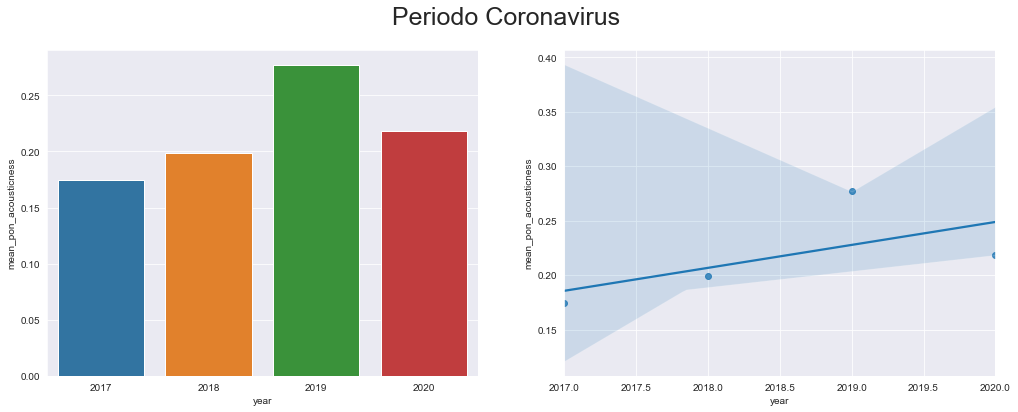

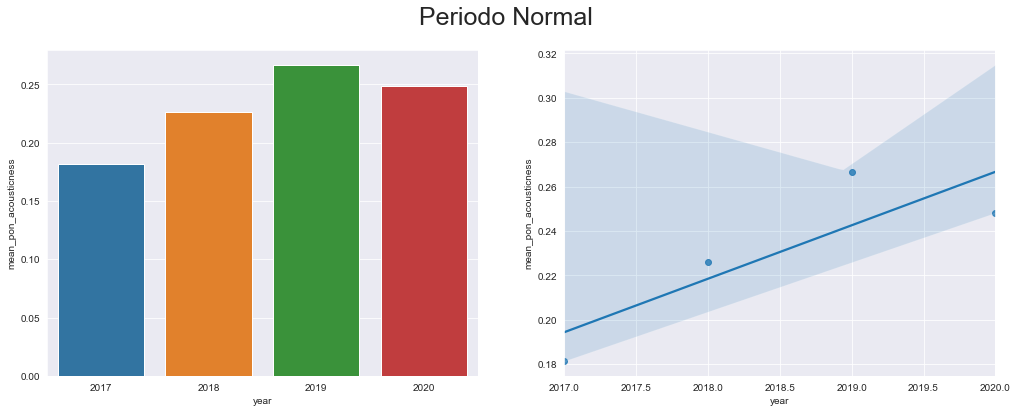

In [99]:
plot_features_analysis('acousticness')
plot_features_analysis_altair('acousticness')

### >>> danceability

- **Feature**: ¿Cuánto de bailable es la canción? Es un cálculo que ha hecho Spotify teniendo en cuenta: tempo, rhythm stability, beat strength, and overall regularity. Valores cercanos a 0 es menos bailable y cercanos a 1 muy bailables.
- **Tendencia**: Hay un aumento progresivo, casi a la par en ambos periodos: cada vez se escuchan más música más bailable, pero ojo, en el 2020 no es así.
- **Antes y durante confinamiento**: Durante la pandemia se han escuchado más música menos bailable respecto al año anterior (no es una diferencia grande), pero eso no ocurre en el Periodo Normal. Podemos estar hablando de una diferencia en la que el hecho de que haya una pandemia puede haber influido. ¿Esa pequeña diferencia podría decir que durante la pandemia se han escuchado menos música bailable?, ¿tendría sentido con el encerramiento en casa o no?

Distribución de feature de todas las canciones en Spotify:<br><img src="images_features_distribution/danceability.png" style="width: 600px;">

Diferencia Media en periodo Pandemia y periodo Normal:  0.0030609746204862676


alt.LayerChart(...)

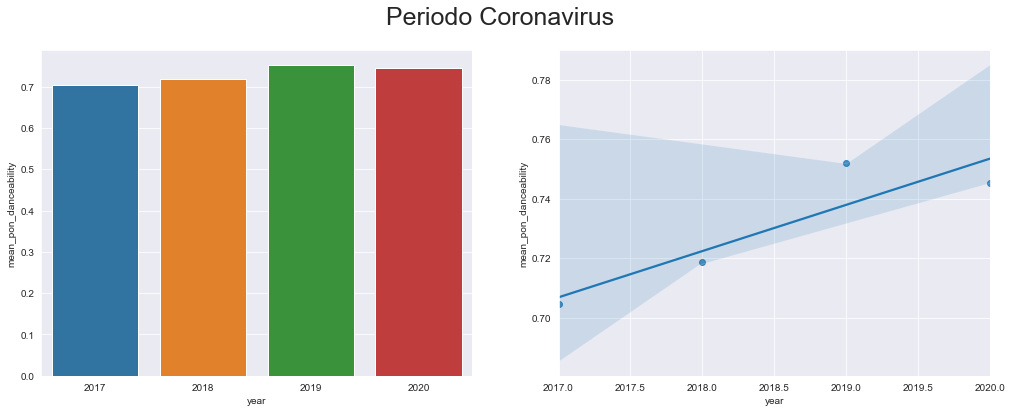

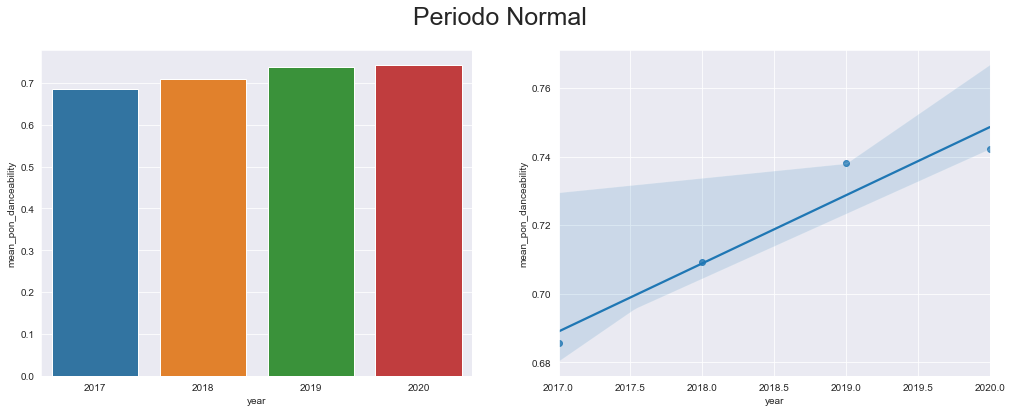

In [100]:
plot_features_analysis('danceability')
plot_features_analysis_altair('danceability')

### >>> energy

- **Feature**: Nos dice cuánto de enérgica es una canción y se relaciona con la velocidad, sonoridad y ruido. Ejemplo: Death metal tendrá un valor alto mientras que una canción de Bach tendrá un valor bajo.
- **Tendencia**: La tendencia es una disminución en la media a lo largo de los años, salvo en el último año, 2020 que en ambos periodos aumenta, se ha cambiado la tendencia.
- **Antes y durante confinamiento**: Aunque hay un aumento de la música enérgica escuchada en el 2020, no se puede decir claramente que sea por el coronavirus porque este efecto ocurre igual en el periodo normal. Saldremos de dudas en el análisis de esta feature con el Análisis de las playlists, más adelante.

Distribución de feature de todas las canciones en Spotify:<br><img src="images_features_distribution/energy.png" style="width: 600px;">

Diferencia Media en periodo Pandemia y periodo Normal:  0.0052907105906966345


alt.LayerChart(...)

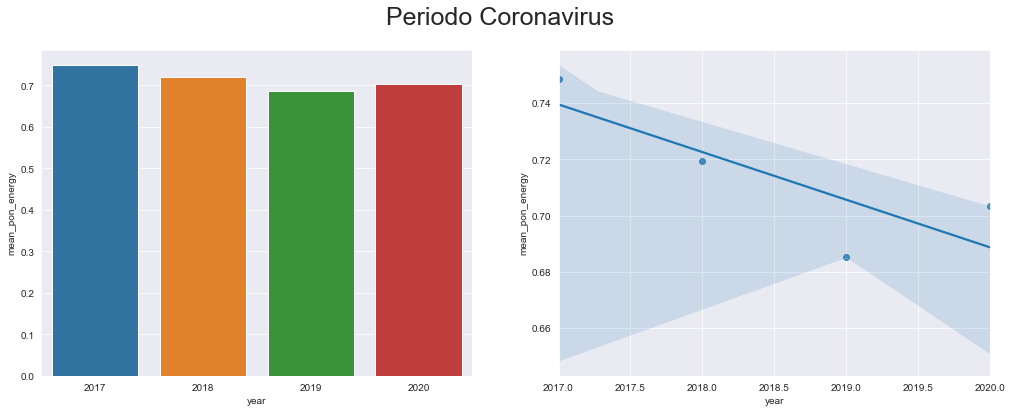

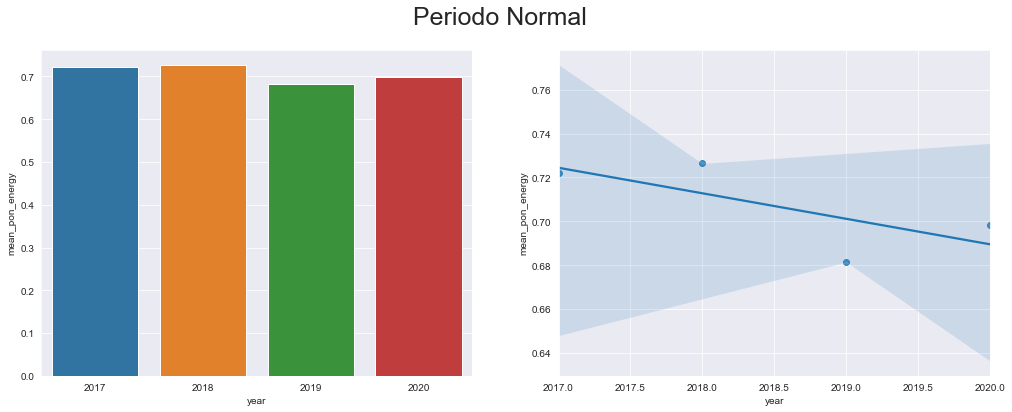

In [104]:
plot_features_analysis('energy')
plot_features_analysis_altair('energy')

### >>> instrumentalness

- **Feature**: Nos dice si una canción tiene audio vocal o no. Por ejemplo una canción de rap es muy vocal y tendrá un valor muy cercano a 0, y al revés si es instrumental. Como casi todas las canciones que existen son vocales, hay muchas cerca del rango 0 (hemos considerado los valores mayores de 0.2 outliers porque eran muy pocos en nuestras canciones).
- **Tendencia**: No arriesgamos a sacar ninguna tendencia porque no tiene sentido considerando que es más una variable para saber si una canción es instrumental o no.
- **Antes y durante confinamiento**: Se podría decir que durante la pandemia se han escuchado más música que es un pelín más instrumental, pero es arriesgado y no aporta.

Distribución de feature de todas las canciones en Spotify (**de esta features consideramos los valores mayores de 0.2 outliers, eran muy pocos en nuestras canciones**)<br><img src="images_features_distribution/instrumentalness.png" style="width: 600px;">

Diferencia Media en periodo Pandemia y periodo Normal:  0.0029797060779090598


alt.LayerChart(...)

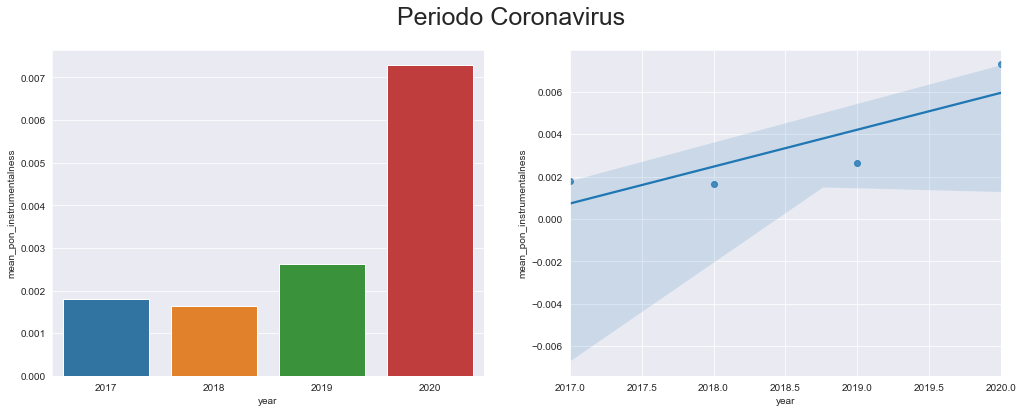

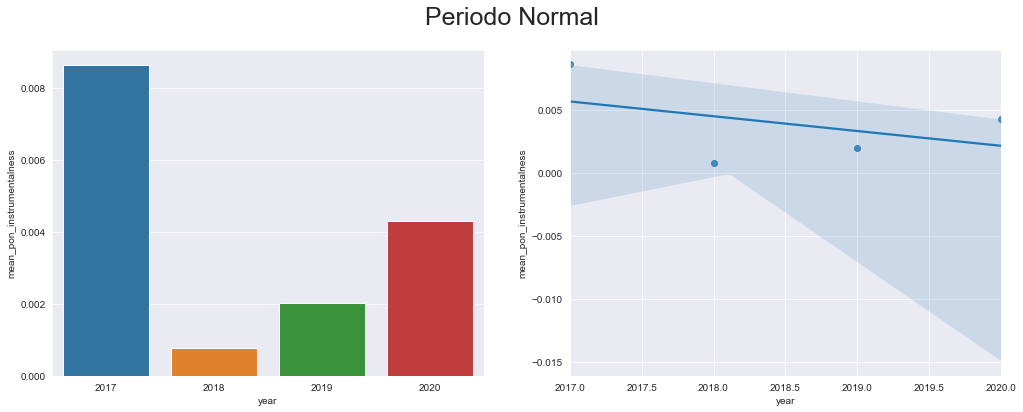

In [107]:
plot_features_analysis('instrumentalness')
plot_features_analysis_altair('instrumentalness')

### >>> valence

- **Feature**: Mide del 0 al 1 la positividad de la canción, siendo canciones muy positivas, felices, alegres, eufóricas las que están más cerca de 1 y canciones más tristes, negativas..., están más cerca de 0.
- **Tendencia**: la tendencia es que se escucha más música más happy, pero no e suan tendencia clara entre años.
- **Antes y durante confinamiento**: Podríamos pensar que deberíamos notar una diferencia durante el periodo pandemia, ya sea que esuchamos más música positiva o negativa, pero la realidad es que no queda tan claro si comparamos con el periodo normal. Pero cuidado, porque recordamos que el periodo normal está cerca de navidad. Esta feature también la veremos con el Análisis de las playlists, más adelante.

Distribución de feature de todas las canciones en Spotify: <br><img src="images_features_distribution/valence.png" style="width: 600px;">

Diferencia Media en periodo Pandemia y periodo Normal:  0.004270127570754734


alt.LayerChart(...)

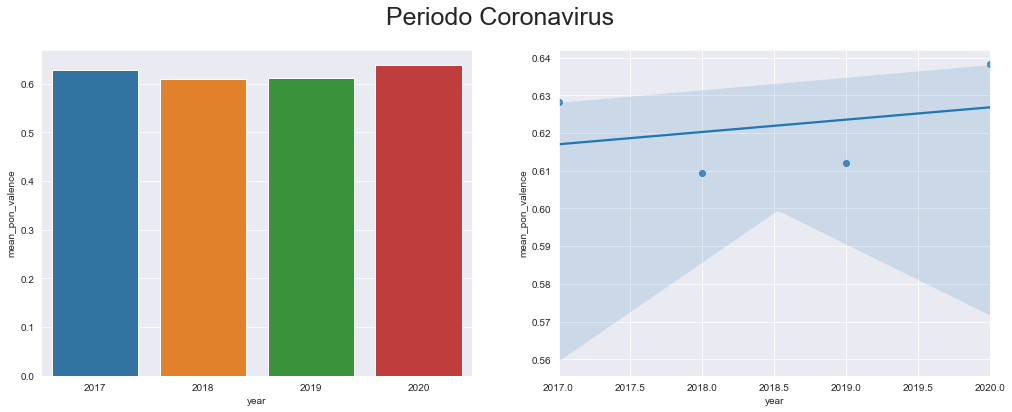

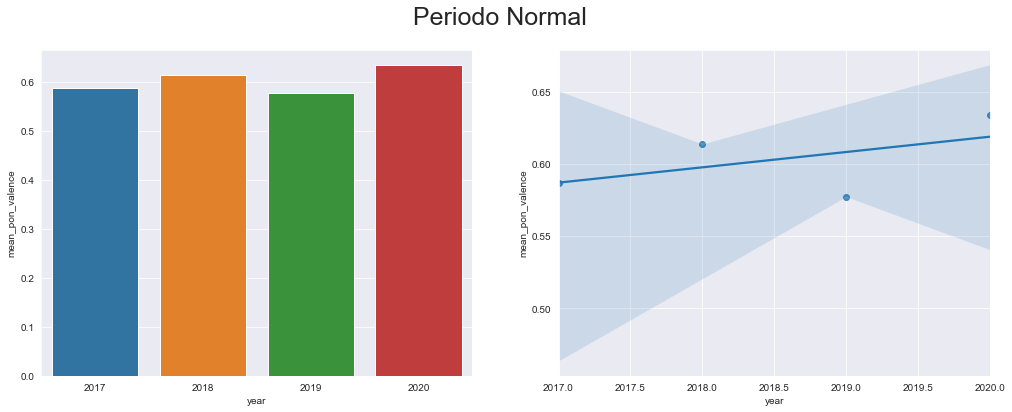

In [110]:
plot_features_analysis('valence')
plot_features_analysis_altair('valence')

### >>> liveness

- **Feature**: Detecta si hay presencia de audiencia en la canción. Valores altos es que es más probable que sea una canción grabada en directo y por encima de 0.8 es una probabilidad alta de que sea en directo.
- **Tendencia**: Se escucha año tras año menos música en directo, pero no son valores muy diferenciables.
- **Antes y durante confinamiento**: La tendencia en periodo normal es una bajada continua, pero en el periodo coronavirus en el 2020 no baja tanto, lo que se puede decir que aunque no ha habido un cambio de tendencia claro, si se ha esuchado más música con más "liveness". ¿el hecho de que hayamos estados encerrados en el confinamiento sin poder escuchar música en directo, ha influencia para que escuchemos más música de este carácter por spotify?

Distribución de feature de todas las canciones en Spotify: <br><img src="images_features_distribution/liveness.png" style="width: 600px;">

Diferencia Media en periodo Pandemia y periodo Normal:  0.003058397933407564


alt.LayerChart(...)

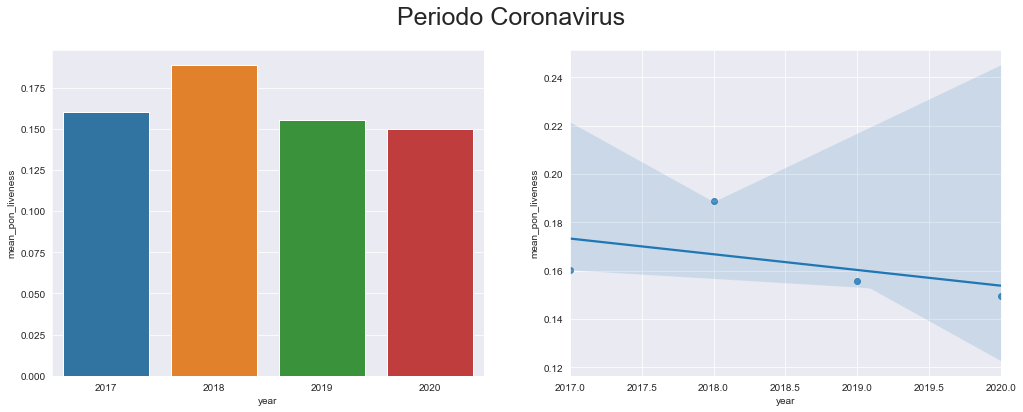

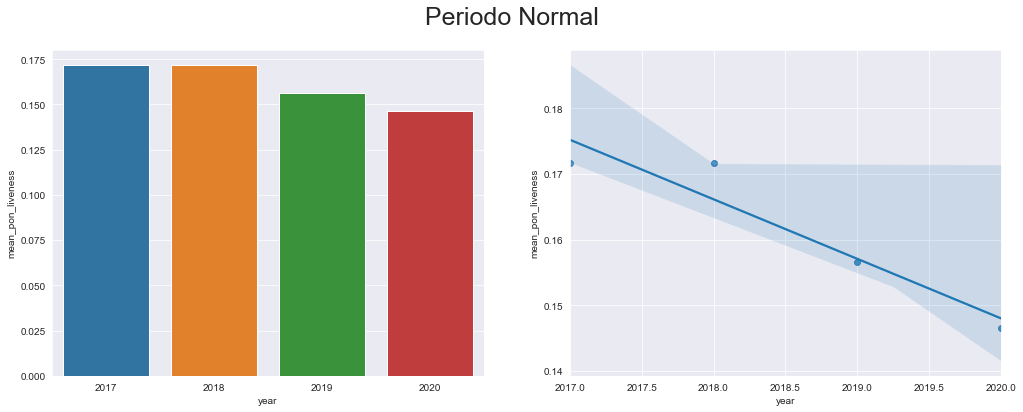

In [113]:
plot_features_analysis('liveness')
plot_features_analysis_altair('liveness')

### >>> loudness

- **Feature**: Cálculo del ruido en decibelios, siendo el cercano a 1 más ruidoso y cercano a 0 menos, teniendo en cuenta que mucha musica se encuentra entre el 0.5 y 1. **Esta feature fue normalizada, por eso la distribución tiene otros rangos de valores**
- **Tendencia y antes y durante confinamiento**: Se puede decir que en el 2020 en el periodo pandemia hay un cambio de tendencia hacia escuchar más música más ruidosa. Teniendo en cuenta que la distrubición de valores se centran en rangos muy pequeños: sí, podríamos confirmar que ese pequeño cambio que en valores no parece grande, si podría serlo comparativamente con años anteriores. Además encaja con un mayor escucha de canciones más enérgicas, porque como ya vimos (pero añado en unscript abajo), estas features están muy correlacionadas.


Distribución de feature de todas las canciones en Spotify: <br><img src="images_features_distribution/loudness.png" style="width: 600px;">

In [118]:
#Ver correlación concreta entre loudness y energy
data_corr = data_ana_corona.loc[:, ['loudness', 'energy']]
corr_metrics2 = data_corr.corr()
corr_metrics2.style.background_gradient()

,loudness,energy
loudness,1.000000,0.727675
energy,0.727675,1.000000


Diferencia Media en periodo Pandemia y periodo Normal:  0.0017814275283791758


alt.LayerChart(...)

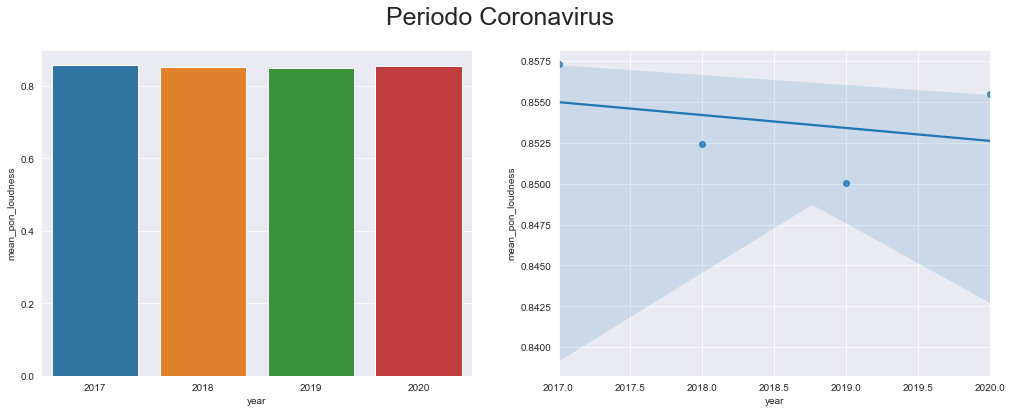

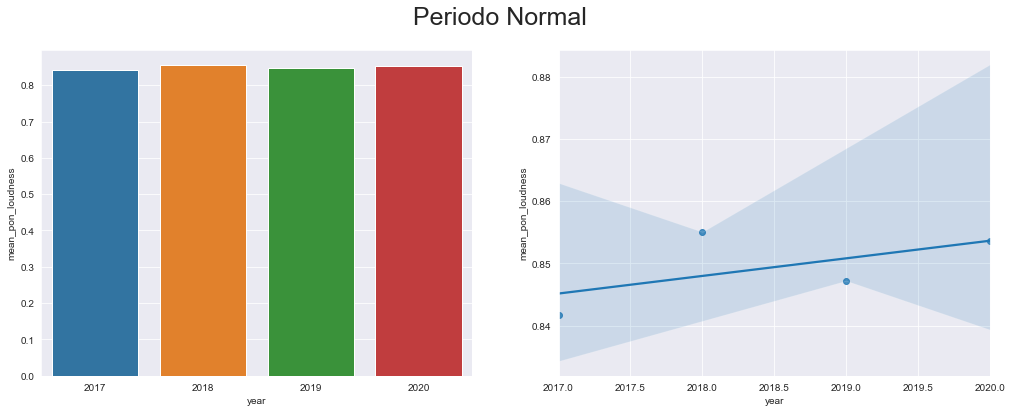

In [119]:
plot_features_analysis('loudness')
plot_features_analysis_altair('loudness')

### >>> Popularity

- **Feature**: Mide la popularidad de la canción, según unos cálculos propios de Spotify. El valor estarña entre 0 y 1, siendo 1 lo más popular. Esta feature está normalizada previamente. Spotify no aporta distribución de la popularidad.
- **Tendencia y antes y durante confinamiento**: Se ve que que la tendencia es que se escuchen canciones que son más populares y se mantiene así en la pandemia, pero es lógico porque nuestros datos provienen del top200, por lo que es probable que sean canciones populares por ese mismo hecho. Sin embargo, en el análisis posterior de playlist obtenemos unos resultados que nos dicen lo contrario, se ha escuchado más música menos popular, lo analizamos más adelante.

Diferencia Media en periodo Pandemia y periodo Normal:  -0.014632672334119357


alt.LayerChart(...)

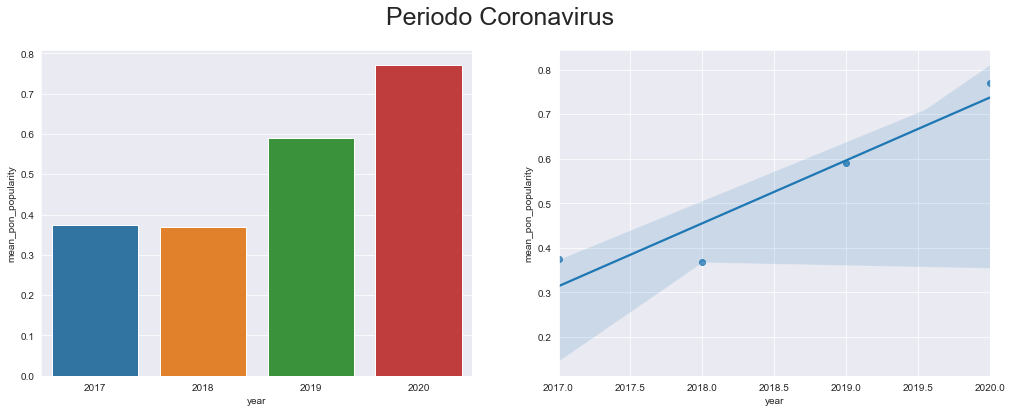

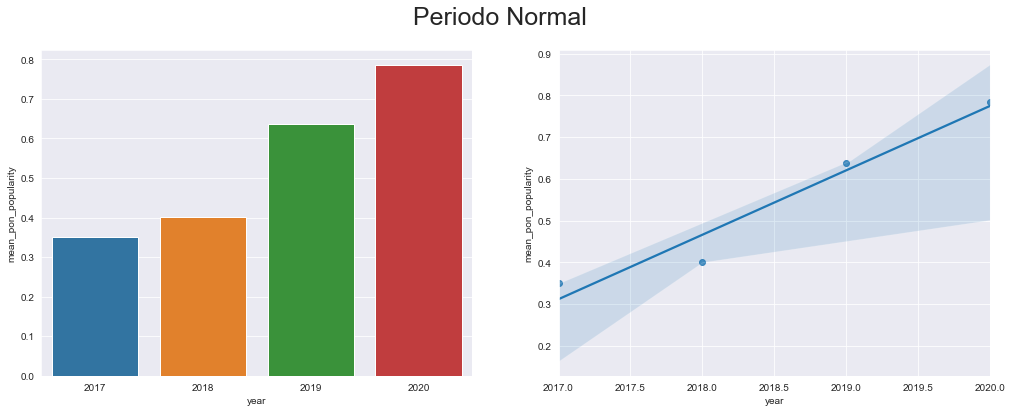

In [122]:
plot_features_analysis('popularity')
plot_features_analysis_altair('popularity')

### >>> speechiness

- **Feature**: Esta feature detecta la presencia de textos hablados, en vez de cantados (audiolibros, talkshows, etc.). Valores entre 0.33 y 0.66 pueden contener música y texto (ej. hiphop). Valores por debajo de 0.33 es música sin texto hablado.
- **Tendencia**: La tendencia es la misma en los años: hay una disminución de escuchar música con menos "speechiness", pero hay saltos entre años, así que no es claro. 
- **Antes y durante confinamiento**: Si comparamos con periodo normal vemos que es muy parecido ambos periodos, por lo que no podemos sacar algo relevante en relación a la pandemia.

Distribución de feature de todas las canciones en Spotify: <br><img src="images_features_distribution/speechiness.png" style="width: 600px;">

Diferencia Media en periodo Pandemia y periodo Normal:  -0.03436402915134473


alt.LayerChart(...)

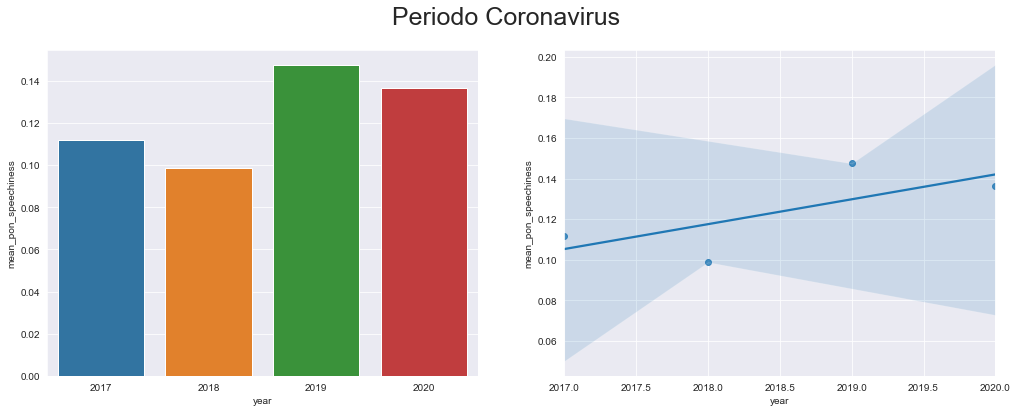

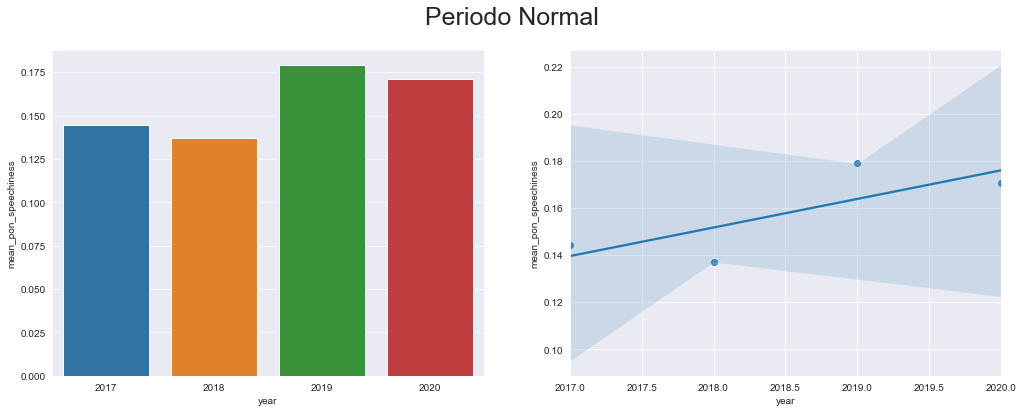

In [124]:
plot_features_analysis('speechiness')
plot_features_analysis_altair('speechiness')

### >>> tempo

- **Feature**: Mide el tempo en beats por minuto. Esta es una feature que hemos normalizado. Una referencia respecto al tempo (aunque habría que imagianrla entre 0 y 1R&B: 75 BPM (Género lento, marcado por notas largas), RAP: 90 BPM, REGGAE: 100 BPM, CUMBIA: 90 BPM, POP/ROCK/DANCE: 120 BPM, HEAVY METAL/ PUNK: 140 BPM
- **Tendencia y antes y durante confinamiento**: Las tendencias son contrarias en cada periodo lo que nos da una idea de que es arriesgado tomar conclusiones de esta feature. También hay salto entre años que no ayudan. Podría decirse tal vez que en el confinamiento se ha escuchado más música con más BPM

Distribución de feature de todas las canciones en Spotify: <br><img src="images_features_distribution/tempo.png" style="width: 600px;">

Diferencia Media en periodo Pandemia y periodo Normal:  -0.016136843760713837


alt.LayerChart(...)

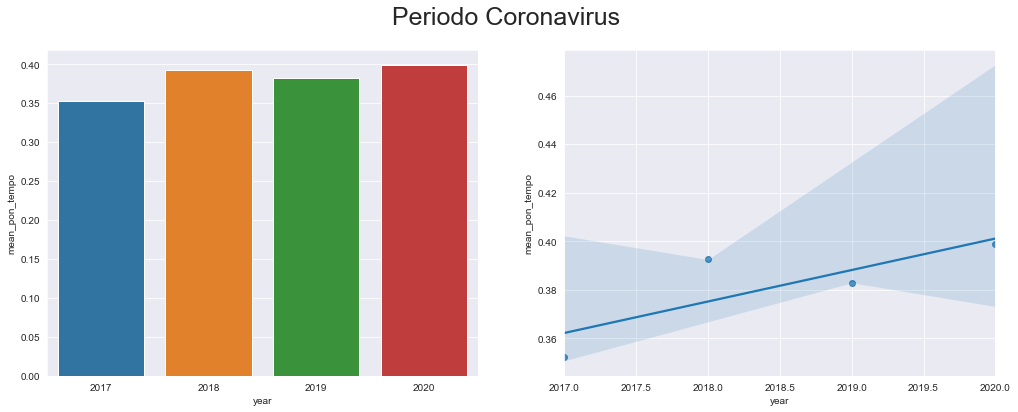

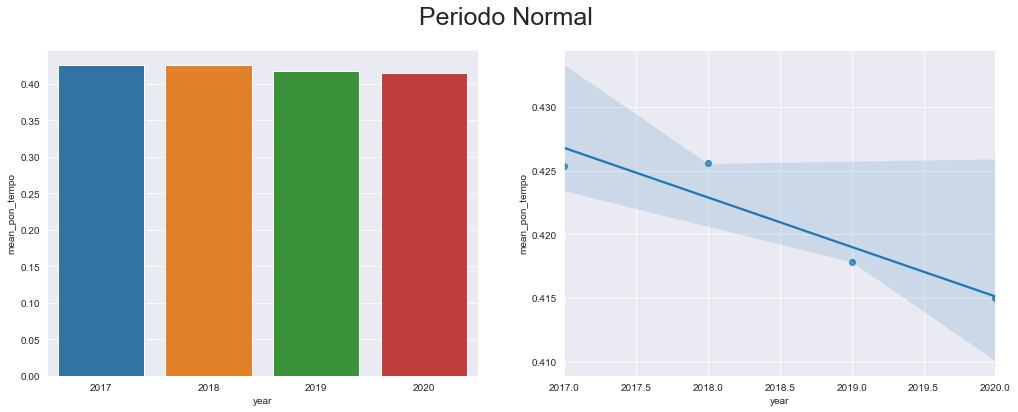

In [127]:
plot_features_analysis('tempo')
plot_features_analysis_altair('tempo')

### >>> Length

- **Feature**: Longitud de las canciones, a mayor valor, más larga. Se ha normalizado entre 0 y 1.
- **Tendencia**: Se ve que que la tendencia es que la longitud de las canciones más escuchadas sean cada vez más cortas, año tras año.siendo más claro en el Periodo Normal
- **Antes y durante confinamiento**: Parece que se escucha más música de canciones cortas durante el confinamiento porque el cambio es más brusco que en le periodo normal, aún así, puede estar influenciado por la tendencia.


Diferencia Media en periodo Pandemia y periodo Normal:  -0.055362713694575294


alt.LayerChart(...)

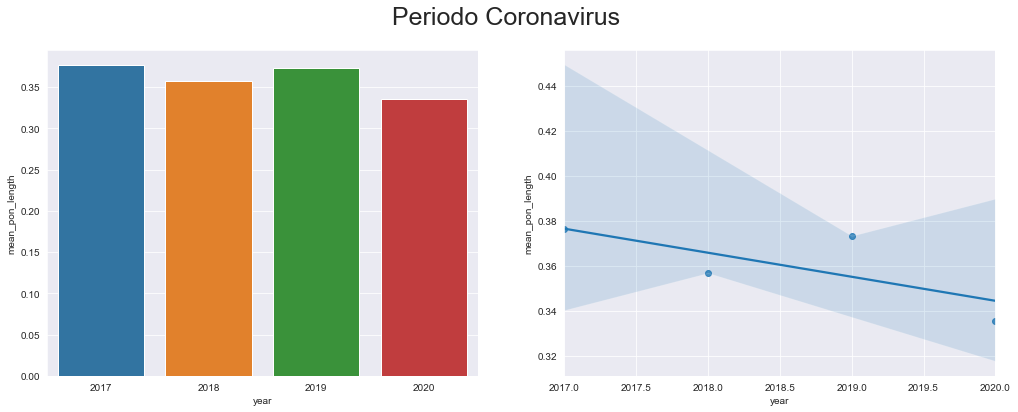

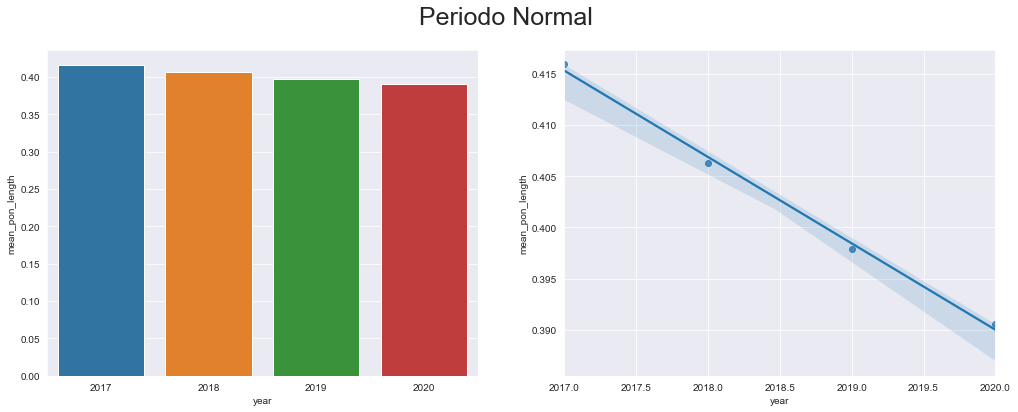

In [128]:
plot_features_analysis('length')
plot_features_analysis_altair('length')

## Conclusión:

Tema a muy tener en cuenta:

- Se sacan algunos datos claros y otros no tantos sobre cambios en los tipos de música. Es por eso que decido hacer otro análisis con otros datos en el último Notebook y que nos ayudará a reforzar unas conclusiones.
- Los lanzamientos de discos de mucho éxito pueden influir bastante en las medias de las features para un periodo tan concreto y falsear datos de tendencias. Por ejemplo, Bad Bunny que tiene una cantidad de Streams muy altas duarnte el periodo de Coronavirus, lanzó album el 29 de febrero de 2020, esto quiere decir que si se ha escuchado mucha música suya durante ese periodo, la media de las features, se acercará a las medias de las features de sus canciones. Como próximo análisis se podría comparar las medias de las canciones de dicho artistas con las del periodo completo



## Después de este análisis pasamos a los siguientes:
- [Data_Analysis2_Genres.ipynb](Data_Analysis2_Genres.ipynb)


**De este Notebook extraemos los siguientes CSVs que usaremos en análisis posteriores para tener ya cierta info añadida:**
- data_ana_coronaperiod.csv
- data_ana_normalperiod.csv